Versiones de las librerías a utilizar con el notebook

In [7]:
# !pip install scikit-learn==1.2.2
# !pip install pandas==1.5.3
# !pip install numpy==1.25.2
# !pip install seaborn==0.13.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, OneHotEncoder, LabelEncoder, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif, SelectFromModel
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, roc_auc_score

warnings.filterwarnings("ignore", category=FutureWarning)  # Ignorar FutureWarnings
pd.set_option('mode.use_inf_as_na', False)  # Desactivar use_ing_as_na

In [9]:
print("Versión de sklearn:", sklearn.__version__)
print("Versión de pandas:", pd.__version__)
print("Versión de numpy:", np.__version__)
print("Versión de seaborn:", sns.__version__)

Versión de sklearn: 1.2.2
Versión de pandas: 1.5.3
Versión de numpy: 1.25.2
Versión de seaborn: 0.13.1


In [10]:
#Defino el valor de la semilla
seed = 2313

# Define la paleta de colores "ocean"
sns.set_palette("ocean")

In [11]:
#Obtener el csv
data = pd.read_csv( "datos_practica_miss.csv")
data.head()

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.78,NaN,no,no,NaN,NaN,Sometimes,no,2.0,NaN,NaN,0.0,Sometimes,Public_Transportation,NaN


# Manejo de los datos

## Exploración de los datos

In [12]:
# Elimino la columna del índice que me sobra
data = data.drop(data.columns[0], axis=1)

# Obtengo el número de filas y columnas del DataFrame
filas = data.shape[0]
columnas = data.shape[1]

# Imprimo el mensaje con el número de filas y columnas
print('---------------------------------------')
print('El df tiene', filas, 'filas y', columnas, 'columnas  |')
print('---------------------------------------')

data.head()

---------------------------------------
El df tiene 2111 filas y 17 columnas  |
---------------------------------------


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,NaN,no,no,NaN,NaN,Sometimes,no,2.0,NaN,NaN,0.0,Sometimes,Public_Transportation,NaN


In [13]:
#Verificar el tipo de datos de las columnas
tipos_de_datos = data.dtypes
print(tipos_de_datos)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [14]:
data.shape

(2111, 17)

In [15]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [16]:
#En total tenemos 17 columnas.
#Crear una lista con las columnas categóricas y numericas
categoricas_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] #9 columnas
numericas_list = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']#8 columnas

#Creo que la variable objetivo es: NObeyesdad (Predecir si la persona tiene obesidad o no)

binarias_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
range_list = ['Age', 'Height', 'Weight',]
catego_list = ['FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

In [17]:
# Lista de columnas de interés
columnas_interes = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"] #9 columnas

# Itera a través de las columnas de interés en el DataFrame
for columna in columnas_interes:
    # Obtiene los valores únicos de cada columna y los imprime
    valores_unicos = data[columna].unique()
    print(f"{columna}: {valores_unicos}")


Gender: ['Female' 'Male' nan]
family_history_with_overweight: ['yes' 'no' nan]
FAVC: ['no' 'yes' nan]
CAEC: ['Sometimes' 'Frequently' 'Always' nan 'no']
SMOKE: ['no' 'yes' nan]
SCC: ['no' 'yes' nan]
CALC: ['no' 'Sometimes' 'Frequently' nan 'Always']
MTRANS: ['Public_Transportation' 'Walking' nan 'Motorbike' 'Automobile' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' nan 'Obesity_Type_I'
 'Overweight_Level_II' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [18]:
#Lista de columnas donde los datos no toman solo números enteros
colums_rare_numbers = ["FCVC", "NCP", "CH2O", "FAF", "TUE"] #5 columnas

for columna in colums_rare_numbers:
    # Obtiene el valor más alto y el valor más bajo de cada columna y los imprime
    valor_maximo = data[columna].max()
    valor_minimo = data[columna].min()
    print(f"{columna}: Máximo - {valor_maximo}, Mínimo - {valor_minimo}")


print('-----------------------------------------------------------------------------')
for columna in colums_rare_numbers:
    # Obtiene los valores únicos de cada columna y los imprime
    valores_unicos = data[columna].unique()
    print(f"{columna}: {valores_unicos}")

FCVC: Máximo - 3.0, Mínimo - 1.0
NCP: Máximo - 4.0, Mínimo - 1.0
CH2O: Máximo - 3.0, Mínimo - 1.0
FAF: Máximo - 3.0, Mínimo - 0.0
TUE: Máximo - 2.0, Mínimo - 0.0
-----------------------------------------------------------------------------
FCVC: [2.       3.            nan 1.       2.450218 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.530066 2.241606 1.003566 2.652779 2.897899 2.483979
 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199 2.943749
 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421 2.753752
 2.318355 2.594653 2.886157 

Gender                            48
Age                               51
Height                            43
Weight                            43
family_history_with_overweight    43
FAVC                              54
FCVC                              51
NCP                               50
CAEC                              47
SMOKE                             32
CH2O                              37
SCC                               48
FAF                               54
TUE                               46
CALC                              42
MTRANS                            46
NObeyesdad                        43
dtype: int64


<AxesSubplot: >

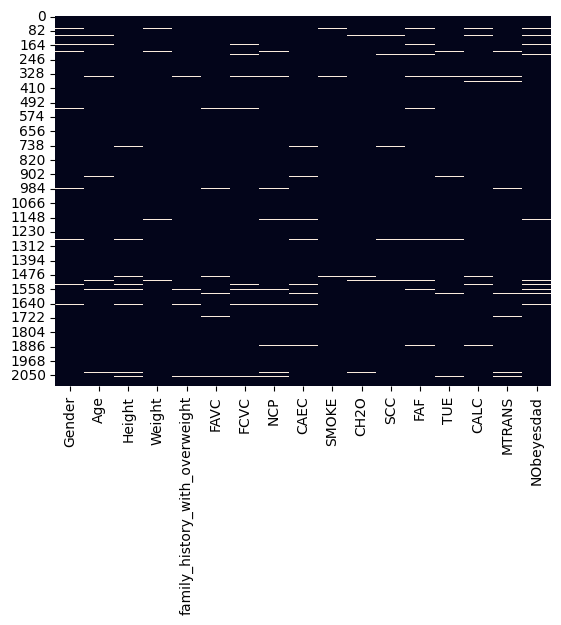

In [19]:
#Veo los valores perdidos de cada variable
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False)

En este dataset la falta de datos no significa nada.

In [20]:
#Duplicados
data.duplicated().sum()

24

In [21]:
# Elimina los duplicados en el DataFrame
data_sin_duplicados = data.drop_duplicates()
print(data_sin_duplicados.duplicated().sum())
print('Shape:', data_sin_duplicados.shape)

0
Shape: (2087, 17)


## Manejo de valores nulos e imputación

Luego de análizar el dataset que nos dieron, he llegado a la conclusión de que el hecho de que hayan datos "nan" no aportan valor al análisis, pues en aquellos casos en donde se necesita existe un valor llamado "No". Por ende hay que eliminar todos los nan del dataset.

In [22]:
data_sin_duplicados.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,NaN,no,no,NaN,NaN,Sometimes,no,2.0,NaN,NaN,0.0,Sometimes,Public_Transportation,NaN


In [23]:
data2 = data_sin_duplicados.copy()

#Mapeo las columnas binarias a 1 y 0

binarias_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Mapea 'yes' y 'Male' a 1, 'no' y 'Female' a 0 en las columnas binarias
data2.loc[:, binarias_list] = data2[binarias_list].replace({'yes': 1, 'Male': 1, 'no': 0, 'Female': 0})

# Muestra las primeras filas del DataFrame después de las transformaciones
data2.head()

/var/folders/w6/ng560w991vj7bwd_cwcr9m1m0000gn/T/ipykernel_68857/2504073108.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data2.loc[:, binarias_list] = data2[binarias_list].replace({'yes': 1, 'Male': 1, 'no': 0, 'Female': 0})


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,Sometimes,0.0,2.0,0.0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,Sometimes,1.0,3.0,1.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,Sometimes,0.0,2.0,0.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,Sometimes,0.0,2.0,0.0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1.0,22.0,1.78,NaN,0.0,0.0,NaN,NaN,Sometimes,0.0,2.0,NaN,NaN,0.0,Sometimes,Public_Transportation,NaN


In [24]:
# Función para mapear los valores
def map_obesity_category(value):
    if value in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II']:
        return 0
    elif value in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
        return 1
    else:
        return np.nan

# Crear la nueva columna Obesity usando apply y la función map_obesity_category
data2['Obesity'] = data2['NObeyesdad'].apply(lambda x: map_obesity_category(x))


In [25]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,Sometimes,0.0,2.0,0.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,Sometimes,1.0,3.0,1.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,Sometimes,0.0,2.0,0.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,Sometimes,0.0,2.0,0.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0
4,1.0,22.0,1.78,NaN,0.0,0.0,NaN,NaN,Sometimes,0.0,2.0,NaN,NaN,0.0,Sometimes,Public_Transportation,NaN,NaN


In [26]:
# A cada categoria le asigno un número con LabelEncoder, dejando a los NaN intactos.
category_cols = ['CAEC', 'CALC', 'MTRANS']
#category_cols = [4, 4, 5]

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Itera sobre las columnas categóricas
for columna_categorica in category_cols:
    # Identifica las categorías existentes antes de la transformación
    categorias_existentes = data2[columna_categorica].dropna().unique()

    # Aplica LabelEncoder solo a las categorías existentes y deja los NaN como NaN
    data2[columna_categorica] = data2[columna_categorica].apply(lambda x: label_encoder.fit(categorias_existentes).transform([x])[0] if pd.notna(x) and x in categorias_existentes else x)


In [27]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,NaN,0.0,0.0,NaN,NaN,2.0,0.0,2.0,NaN,NaN,0.0,2.0,3.0,NaN,NaN


In [28]:
#Aplico KNN para eliminar los NaN de las columnas que ya he tratado

# Combina las listas para incluir todas las columnas relevantes
columnas_imputar = binarias_list + category_cols

# Crea una instancia de KNNImputer con la métrica "nan_euclidean"
imputer_knn = KNNImputer(n_neighbors=5, metric="nan_euclidean")

# Aplica KNNImputer a todas las columnas con NaN
data2[columnas_imputar] = imputer_knn.fit_transform(data2[columnas_imputar])

# Muestra las primeras filas del DataFrame después de la imputación
data2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,NaN,0.0,0.0,NaN,NaN,2.0,0.0,2.0,0.2,NaN,0.0,2.0,3.0,NaN,NaN


Gender                            0
family_history_with_overweight    0
FAVC                              0
SMOKE                             0
SCC                               0
CAEC                              0
CALC                              0
MTRANS                            0
dtype: int64


<AxesSubplot: >

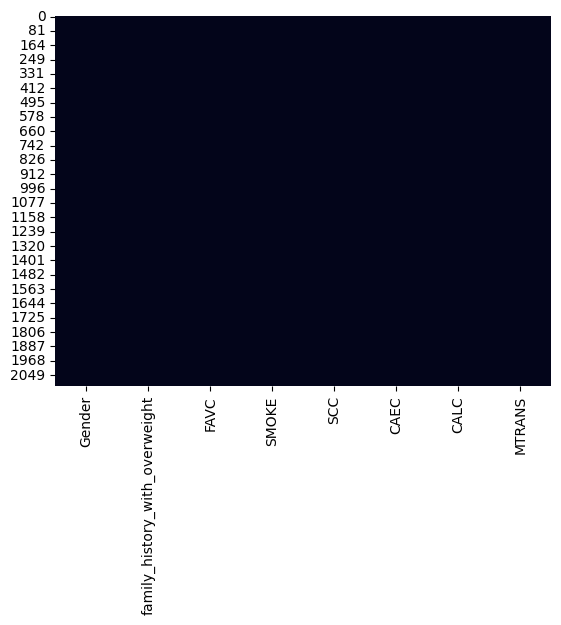

In [29]:
#Confirmo si tengo valores NaN dentro de los datos que ya modifiqué.
#Ojo que aún no he imputado todas las variables.
print(data2[columnas_imputar].isnull().sum())
sns.heatmap(data2[columnas_imputar].isnull(), cbar=False)

In [30]:
#category_cols = [4, 4, 5]

# Reviso que los valores que hayan tomado los datos NaN
#esten dentro de las opciones disponibles previamente.

for columna in category_cols:
    valores_unicos = sorted(data2[columna].unique())
    print(f"Valores únicos en {columna}: {valores_unicos}")


Valores únicos en CAEC: [0.0, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]
Valores únicos en CALC: [0.0, 1.0, 1.6, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
Valores únicos en MTRANS: [0.0, 0.6, 1.0, 1.2, 1.4, 1.8, 2.0, 2.2, 2.4, 2.6, 3.0, 4.0]


In [31]:
data2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,NaN,0.0,0.0,NaN,NaN,2.0,0.0,2.0,0.2,NaN,0.0,2.0,3.0,NaN,NaN


Hasta el momento ya he eliminado los NaN de las siguientes variables:



*   'Gender',
* 'family_history_with_overweight',
* 'FAVC',
* 'SMOKE',
* 'SCC',
* 'CAEC',
* 'CALC',
* 'MTRANS',
* 'NObeyesdad'


---


Columnas pendientes:
'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'

Con eso haremos 2 grupos, el grupo en donde los datos se agruparan ('Age', 'Height', 'Weight',)

Y el grupo de exploracion_columnas_dudosas = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], pues considero que no deberían de poseer decimales por lo que significa cada columna.

In [32]:
exploracion_columnas_dudosas = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for columna in exploracion_columnas_dudosas:
    valores_unicos = sorted(data2[columna].unique())
    print(f"Valores únicos en {columna}: {valores_unicos}")


Valores únicos en FCVC: [1.003566, 1.00876, 1.036414, 1.052699, 1.063449, 1.064162, 1.078529, 1.118436, 1.202075, 1.204855, 1.206276, 1.27785, 1.303878, 1.450218, 1.567101, 1.570089, 1.601236, 1.620845, 1.642241, 1.649974, 1.69427, 1.729824, 1.75375, 1.758394, 1.786841, 1.834155, 1.871213, 1.889883, 1.901611, 1.906194, 1.94313, 1.977298, 1.993101, 2.0, 2.000466, 2.004146, 2.021446, 2.048582, 2.052152, 2.061952, 2.086093, 2.108711, 2.120185, 2.188722, 2.19005, 2.21232, 2.217267, 2.278644, 2.291846, 2.293705, 2.303367, 2.341133, 2.34222, 2.357496, 2.366949, 2.37464, 2.39728, 2.424977, 2.427689, 2.432886, 2.446872, 2.486189, 2.494451, 2.508835, 2.510583, 2.543563, 2.555401, 2.559571, 2.577427, 2.613249, 2.615788, 2.627031, 2.652958, 2.673638, 2.690754, 2.707666, 2.708965, 2.749268, 2.801514, 2.81646, 2.838969, 2.839048, 2.853513, 2.86099, 2.866383, 2.869436, 2.883745, 2.896562, 2.903545, 2.910345, 2.911877, 2.913486, 2.915279, 2.91548, 2.919584, 2.919751, 2.948248, 2.948425, 2.95118, 2.95

In [33]:
for columna in exploracion_columnas_dudosas:
    # 1. Cuántos datos hay en la columna
    total_datos = data2[columna].shape[0]
    print(f"1. Total de datos en la columna {columna}: {total_datos}")

    # 2. Cuántos datos NaN y su porcentaje correspondiente
    datos_nan = data2[columna].isna().sum()
    porcentaje_nan = (datos_nan / total_datos) * 100
    print(f"2. Datos NaN en la columna {columna}: {datos_nan} ({porcentaje_nan:.2f}%)")

    # 3. Porcentaje de números enteros y decimales (excluyendo NaN)
    datos_no_nan = data2[columna].dropna()
    porcentaje_enteros = (datos_no_nan.astype(int) == datos_no_nan).sum() / len(datos_no_nan) * 100
    porcentaje_decimales = 100 - porcentaje_enteros
    print(f"3. Porcentaje de números enteros en la columna {columna}: {porcentaje_enteros:.2f}%")
    print(f"   Porcentaje de números decimales en la columna {columna}: {porcentaje_decimales:.2f}%")
    print('----------------------------------------------------------------------')


1. Total de datos en la columna FCVC: 2087
2. Datos NaN en la columna FCVC: 51 (2.44%)
3. Porcentaje de números enteros en la columna FCVC: 60.56%
   Porcentaje de números decimales en la columna FCVC: 39.44%
----------------------------------------------------------------------
1. Total de datos en la columna NCP: 2087
2. Datos NaN en la columna NCP: 50 (2.40%)
3. Porcentaje de números enteros en la columna NCP: 69.02%
   Porcentaje de números decimales en la columna NCP: 30.98%
----------------------------------------------------------------------
1. Total de datos en la columna CH2O: 2087
2. Datos NaN en la columna CH2O: 37 (1.77%)
3. Porcentaje de números enteros en la columna CH2O: 38.15%
   Porcentaje de números decimales en la columna CH2O: 61.85%
----------------------------------------------------------------------
1. Total de datos en la columna FAF: 2087
2. Datos NaN en la columna FAF: 54 (2.59%)
3. Porcentaje de números enteros en la columna FAF: 42.06%
   Porcentaje de núm

Vale luego de análisar y tener en cuenta, decido lo siguiente:

**FCVC**: Representa el nivel de consumo de vegetales del individuo. Y dado que el 60% de los datos son datos enteros, transformaré la columna a datos enteros.

**NCP**: Indica la cantidad de comidas principales que el individuo consume al día. Y dado que no puedo tener 1.5 desayunos y que casi el 70% de los datos son enteros también transformaré esta columna a enteros.


Con las columnas **CH2O, FAF y TUE** aunque el porcentaje de los datos decimales es mayor porque lo que me indica mi lógica estos datos también deben de corresponder a un número entero, así que también los transformaré dado la naturaleza de los datos a los que representan.

---

**Overfitting:** Si es que en el futuro encuentro overfitting en mi modelo es que puede que haya modificado mucho la naturaleza inicial de mis datos y eso concluya con un modelo entrenado unicamente para mis datos modificados.



In [34]:
exploracion_columnas_dudosas

['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [35]:
#Aplico KNN para eliminar los NaN de exploracion_columnas_dudosas y Obesity
exploracion_columnas_dudosas = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

data2[exploracion_columnas_dudosas] = imputer_knn.fit_transform(data2[exploracion_columnas_dudosas])

data2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,0.000000,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.000000,2.0,1.0,3.0,1.0,3.000000,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,2.000000,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.000000,2.0,0.0,2.0,0.0,2.000000,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,NaN,0.0,0.0,2.0,1.438718,2.0,0.0,2.0,0.2,1.594426,0.0,2.0,3.0,NaN,NaN


In [36]:
#Aplico KNN para eliminar los NaN de variables_grupales
variables_grupales = ['Age', 'Height', 'Weight']

# Crea una instancia de KNNImputer con la métrica "nan_euclidean"
ImputerVariablesGrupales = KNNImputer(n_neighbors=3, metric="nan_euclidean")

# Aplica KNNImputer a todas las columnas con NaN
data2[variables_grupales] =ImputerVariablesGrupales.fit_transform(data2[variables_grupales])

# Muestra las primeras filas del DataFrame después de la imputación
data2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.000000,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,0.000000,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.000000,1.0,0.0,3.0,3.000000,2.0,1.0,3.0,1.0,3.000000,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.000000,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,2.000000,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.000000,0.0,0.0,3.0,3.000000,2.0,0.0,2.0,0.0,2.000000,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,73.333333,0.0,0.0,2.0,1.438718,2.0,0.0,2.0,0.2,1.594426,0.0,2.0,3.0,NaN,NaN


In [37]:
#KNN para Obesity
columna_obesity = ['Obesity']

# Aplica KNNImputer a la columna Obesity
data2[columna_obesity] = ImputerVariablesGrupales.fit_transform(data2[columna_obesity])

data2[columna_obesity] = np.round(data2[columna_obesity])

# Muestra las primeras filas del DataFrame después de la imputación
data2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,0.0,21.0,1.62,64.000000,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,0.000000,1.0,3.0,3.0,Normal_Weight,0.0
1,0.0,21.0,1.52,56.000000,1.0,0.0,3.0,3.000000,2.0,1.0,3.0,1.0,3.000000,0.0,2.0,3.0,Normal_Weight,0.0
2,1.0,23.0,1.80,77.000000,1.0,0.0,2.0,3.000000,2.0,0.0,2.0,0.0,2.000000,1.0,1.0,3.0,Normal_Weight,0.0
3,1.0,27.0,1.80,87.000000,0.0,0.0,3.0,3.000000,2.0,0.0,2.0,0.0,2.000000,0.0,1.0,4.0,Overweight_Level_I,0.0
4,1.0,22.0,1.78,73.333333,0.0,0.0,2.0,1.438718,2.0,0.0,2.0,0.2,1.594426,0.0,2.0,3.0,NaN,0.0


In [38]:
#Imputo por la media en esta columna solo para poder mostrar los datos en gráficos
data2['NObeyesdad'].fillna('Normal_Weight', inplace=True)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
Obesity                           0
dtype: int64


<AxesSubplot: >

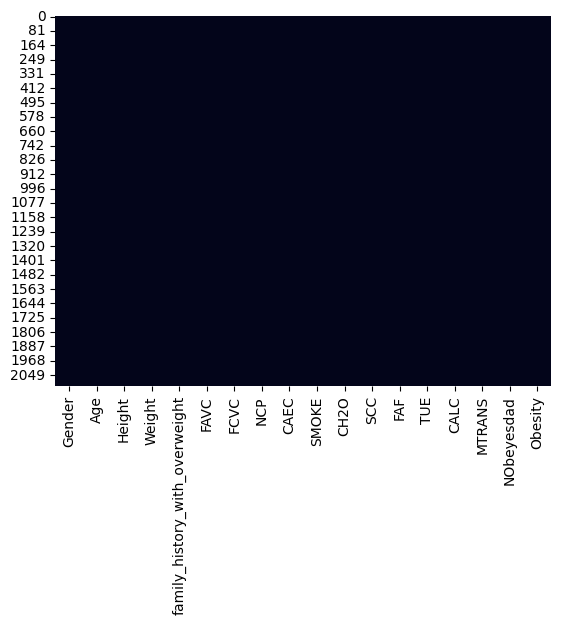

In [39]:
#Reviso que ya no deberían de haber variables NaN en todo el dataset
print(data2.isnull().sum())
sns.heatmap(data2.isnull(), cbar=False)

In [40]:
# Creo las cateforías basandome en los cuantiles para Age, Height y Weight

# Define los cuantiles para cada categoría
quantiles = [0, 0.25, 0.5, 0.75, 1.0]

# Define las etiquetas para cada categoría
labels = [1, 2, 3, 4]

# Aplica la categorización a las columnas Age, Height y Weight y crea nuevas columnas
data2['Age_new'] = pd.qcut(data2['Age'], q=quantiles, labels=labels)
data2['Height_new'] = pd.qcut(data2['Height'], q=quantiles, labels=labels)
data2['Weight_new'] = pd.qcut(data2['Weight'], q=quantiles, labels=labels)


In [41]:
# Convertir las nuevas columnas categóricas a int
data2['Age_new'] = data2['Age_new'].cat.codes.astype('int64')
data2['Height_new'] = data2['Height_new'].cat.codes.astype('int64')
data2['Weight_new'] = data2['Weight_new'].cat.codes.astype('int64')

In [42]:
##Modificación del aspecto físico de data2##

# Define el nuevo orden de las columnas
nuevo_orden_de_columnas = ['Obesity', 'NObeyesdad', 'Gender', 'Age', 'Age_new', 'Height',
                           'Height_new', 'Weight', 'Weight_new', 'FAVC',
                           'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC',
                           'FAF', 'TUE', 'CALC', 'MTRANS',
                           'family_history_with_overweight']

# Reordena las columnas en el DataFrame
data2 = data2[nuevo_orden_de_columnas]

variables_int = ['Obesity', 'Age', 'FCVC', 'NCP', 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'SMOKE',
 'SCC',
 'CAEC',
 'CALC',
 'MTRANS',
 'CH2O',
 'FAF',
 'TUE']

# Aproxima y convierte a enteros los valores en las columnas de variables_int
for columna in variables_int:
    data2[columna] = data2[columna].apply(lambda x: int(round(x)) if pd.notna(x) and np.isfinite(x) else x)

data2[columna] = data2[columna].apply(lambda x: int(round(x)) if pd.notna(x) and np.isfinite(x) else x)

# Muestra las primeras filas del DataFrame después del cambio de orden
data2.head()


,Obesity,NObeyesdad,Gender,Age,Age_new,Height,Height_new,Weight,Weight_new,FAVC,...,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,Normal_Weight,0,21,1,1.62,0,64.000000,0,0,...,3,2,0,2,0,0,1,3,3,1
1,0,Normal_Weight,0,21,1,1.52,0,56.000000,0,0,...,3,2,1,3,1,3,0,2,3,1
2,0,Normal_Weight,1,23,2,1.80,3,77.000000,1,0,...,3,2,0,2,0,2,1,1,3,1
3,0,Overweight_Level_I,1,27,3,1.80,3,87.000000,2,0,...,3,2,0,2,0,2,0,1,4,0
4,0,Normal_Weight,1,22,1,1.78,3,73.333333,1,0,...,1,2,0,2,0,2,0,2,3,0


In [43]:
data2

,Obesity,NObeyesdad,Gender,Age,Age_new,Height,Height_new,Weight,Weight_new,FAVC,...,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,Normal_Weight,0,21,1,1.620000,0,64.000000,0,0,...,3,2,0,2,0,0,1,3,3,1
1,0,Normal_Weight,0,21,1,1.520000,0,56.000000,0,0,...,3,2,1,3,1,3,0,2,3,1
2,0,Normal_Weight,1,23,2,1.800000,3,77.000000,1,0,...,3,2,0,2,0,2,1,1,3,1
3,0,Overweight_Level_I,1,27,3,1.800000,3,87.000000,2,0,...,3,2,0,2,0,2,0,1,4,0
4,0,Normal_Weight,1,22,1,1.780000,3,73.333333,1,0,...,1,2,0,2,0,2,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,Obesity_Type_III,0,21,1,1.710730,2,131.408528,3,1,...,3,2,0,2,0,2,1,2,3,1
2107,1,Obesity_Type_III,0,22,1,1.748584,2,133.742943,3,1,...,3,2,0,2,0,1,1,2,3,1
2108,1,Obesity_Type_III,0,23,1,1.752206,2,133.689352,3,1,...,3,2,0,2,0,1,1,2,3,1
2109,1,Obesity_Type_III,0,24,2,1.739450,2,133.346641,3,1,...,3,2,0,3,0,1,1,2,3,1


In [44]:
data2.dtypes

Obesity                             int64
NObeyesdad                         object
Gender                              int64
Age                                 int64
Age_new                             int64
Height                            float64
Height_new                          int64
Weight                            float64
Weight_new                          int64
FAVC                                int64
FCVC                                int64
NCP                                 int64
CAEC                                int64
SMOKE                               int64
CH2O                                int64
SCC                                 int64
FAF                                 int64
TUE                                 int64
CALC                                int64
MTRANS                              int64
family_history_with_overweight      int64
dtype: object

In [45]:
# Redondear los valores en las columnas 'Weight' y 'Height' a 2 decimales
data2['Weight'] = data2['Weight'].round(2)
data2['Height'] = data2['Height'].round(2)


#Creo un nuevo df
data3 = data2.copy()

# Eliminar las columnas no deseadas
data3.drop(columns=['NObeyesdad', 'Age', 'Height', 'Weight'], inplace=True)

# Mostrar el DataFrame después de eliminar la columna
data3.head()

,Obesity,Gender,Age_new,Height_new,Weight_new,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,0,1,0,0,0,2,3,2,0,2,0,0,1,3,3,1
1,0,0,1,0,0,0,3,3,2,1,3,1,3,0,2,3,1
2,0,1,2,3,1,0,2,3,2,0,2,0,2,1,1,3,1
3,0,1,3,3,2,0,3,3,2,0,2,0,2,0,1,4,0
4,0,1,1,3,1,0,2,1,2,0,2,0,2,0,2,3,0


In [46]:
data3.shape

(2087, 17)

In [47]:
data2.head()

,Obesity,NObeyesdad,Gender,Age,Age_new,Height,Height_new,Weight,Weight_new,FAVC,...,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,Normal_Weight,0,21,1,1.62,0,64.00,0,0,...,3,2,0,2,0,0,1,3,3,1
1,0,Normal_Weight,0,21,1,1.52,0,56.00,0,0,...,3,2,1,3,1,3,0,2,3,1
2,0,Normal_Weight,1,23,2,1.80,3,77.00,1,0,...,3,2,0,2,0,2,1,1,3,1
3,0,Overweight_Level_I,1,27,3,1.80,3,87.00,2,0,...,3,2,0,2,0,2,0,1,4,0
4,0,Normal_Weight,1,22,1,1.78,3,73.33,1,0,...,1,2,0,2,0,2,0,2,3,0


In [48]:
data3.dtypes

Obesity                           int64
Gender                            int64
Age_new                           int64
Height_new                        int64
Weight_new                        int64
FAVC                              int64
FCVC                              int64
NCP                               int64
CAEC                              int64
SMOKE                             int64
CH2O                              int64
SCC                               int64
FAF                               int64
TUE                               int64
CALC                              int64
MTRANS                            int64
family_history_with_overweight    int64
dtype: object

Para este punto en el df se ha logrado lo siguiente:

* Ya no existen datos NaN en el df
* Todos los datos dentro del df son números

## Intuición de datos y exploración

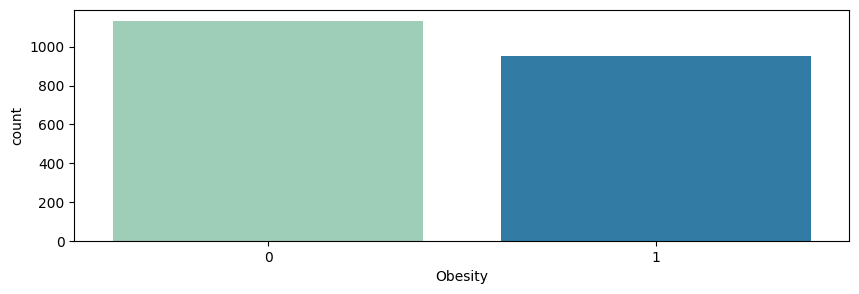

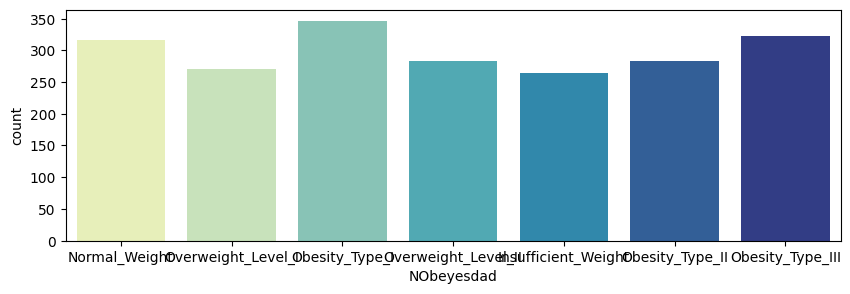

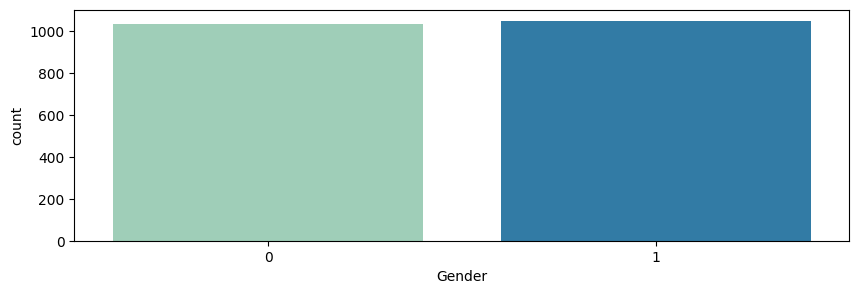

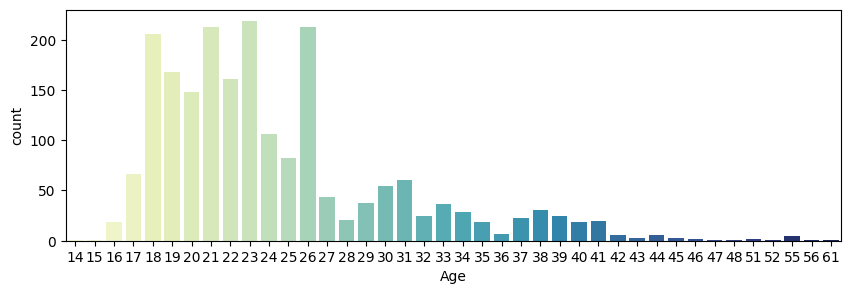

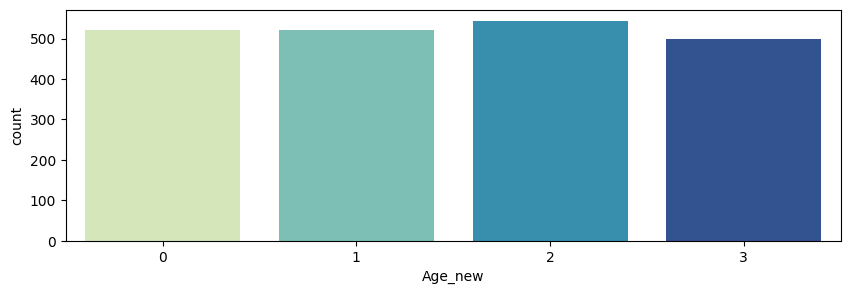

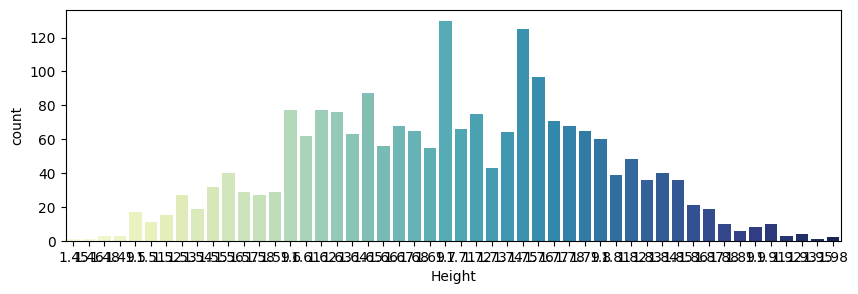

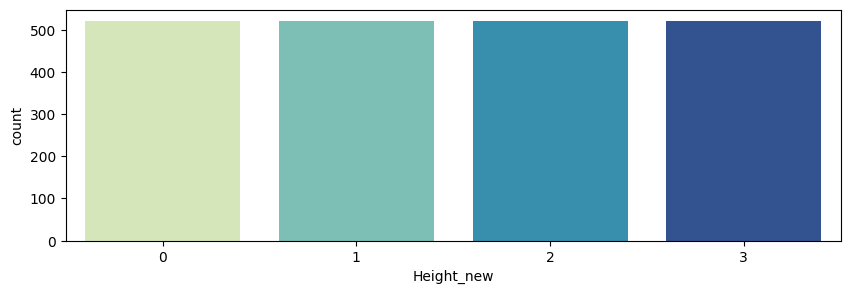

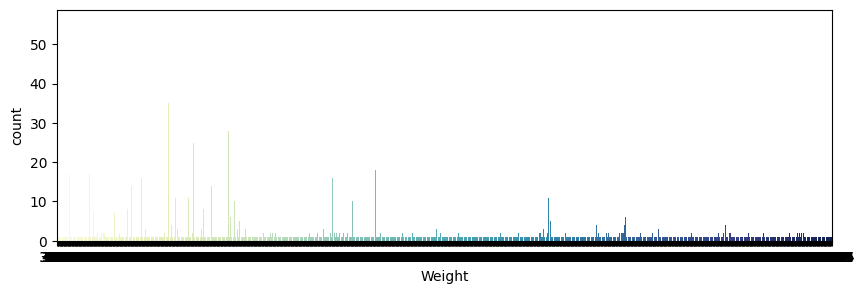

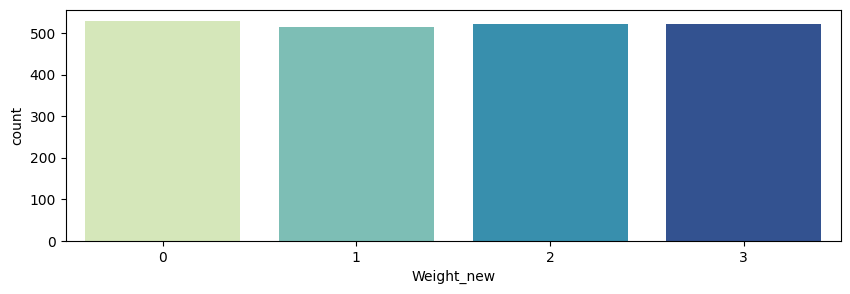

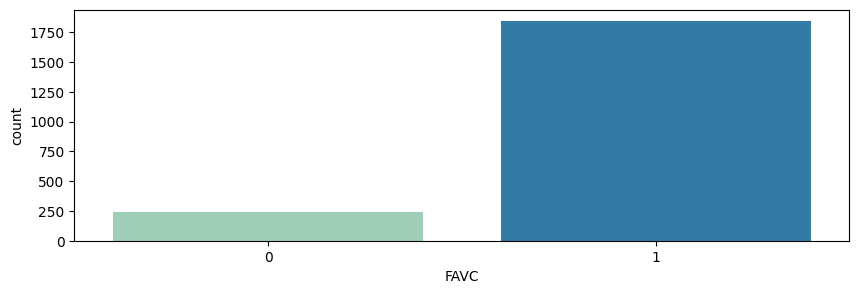

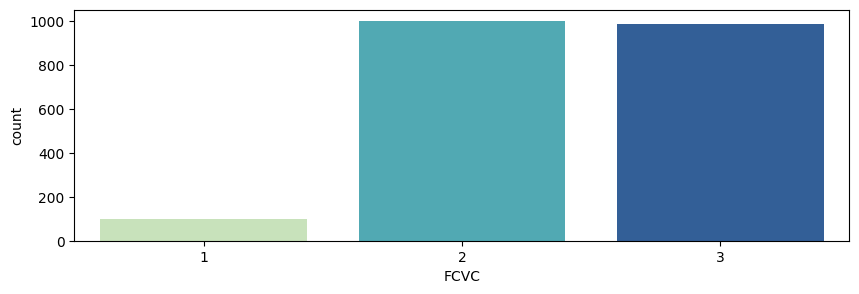

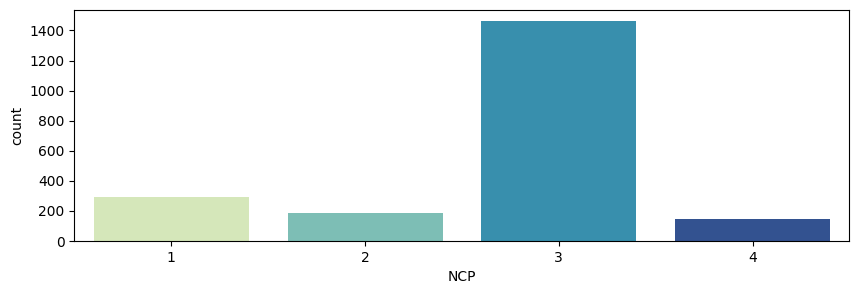

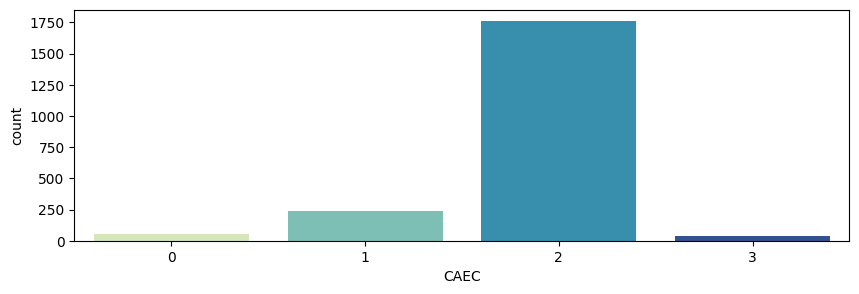

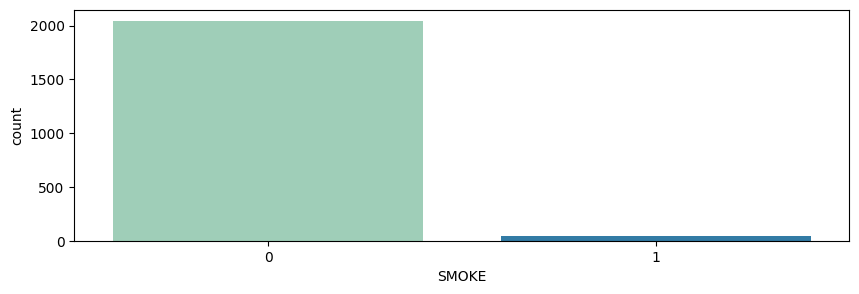

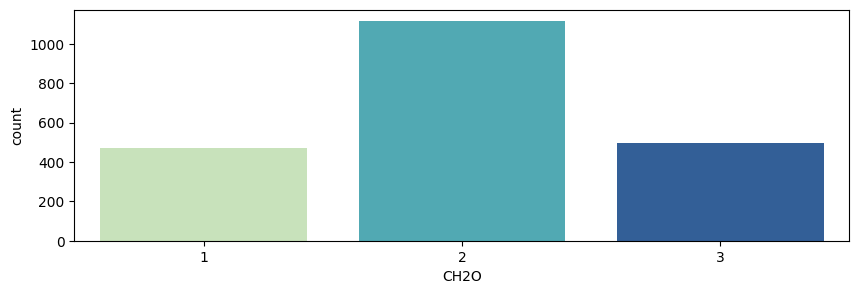

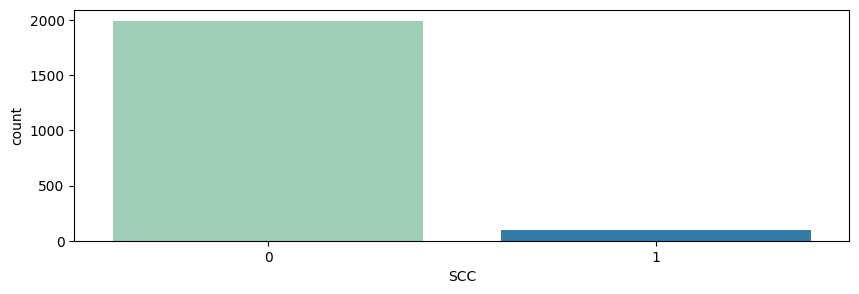

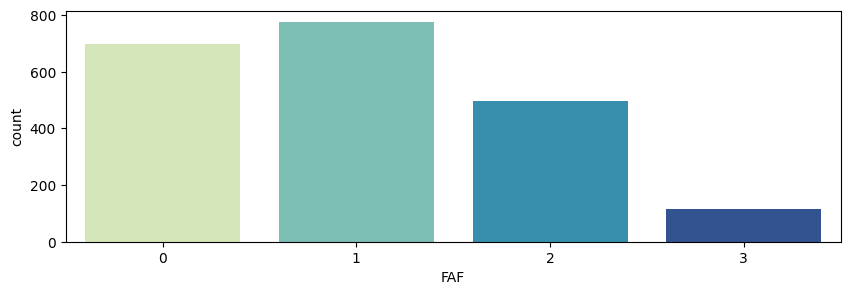

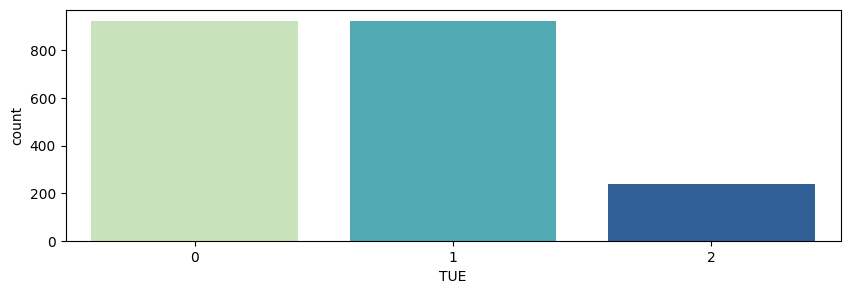

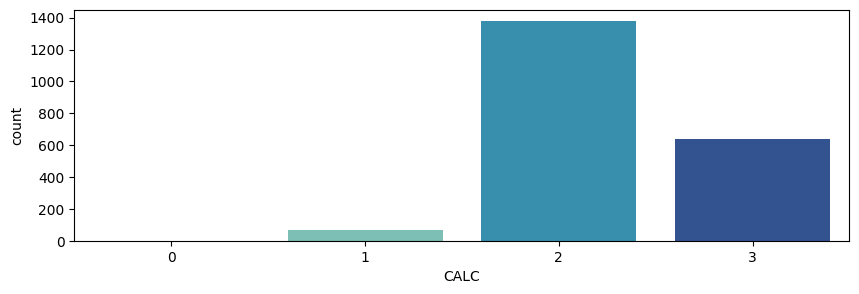

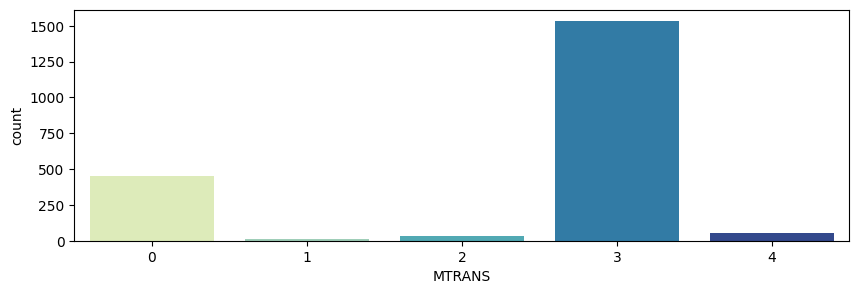

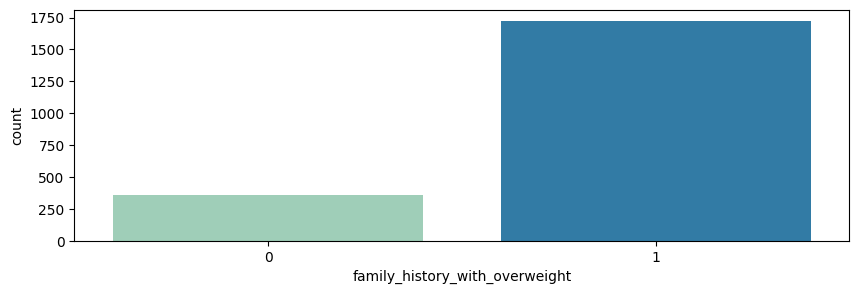

In [49]:
for col in nuevo_orden_de_columnas:
  plt.figure(figsize=(10,3))
  sns.countplot(data=data2, x=col, palette="YlGnBu")
  plt.show()

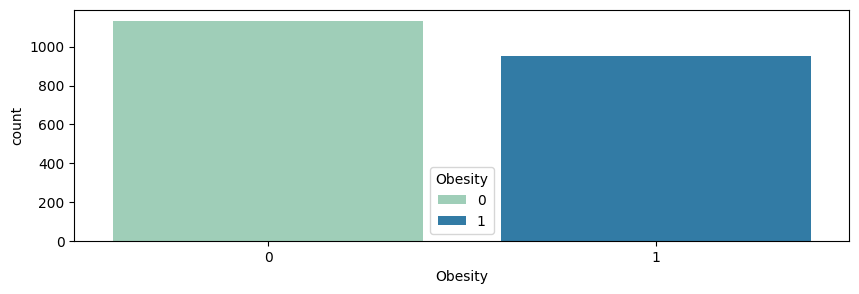

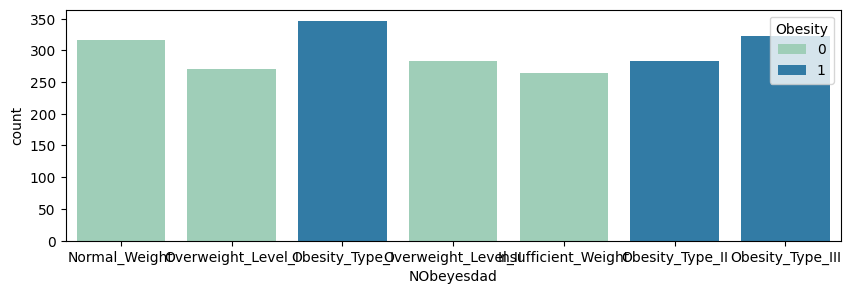

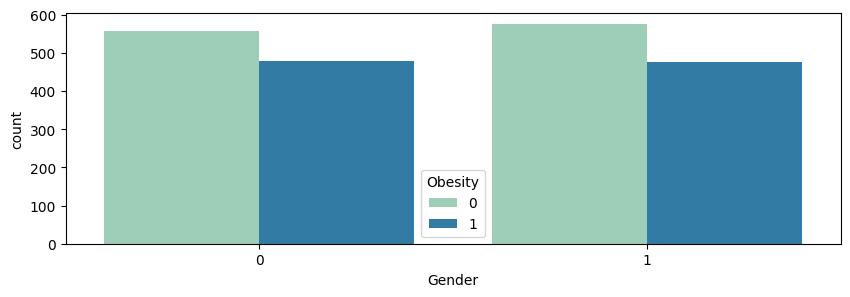

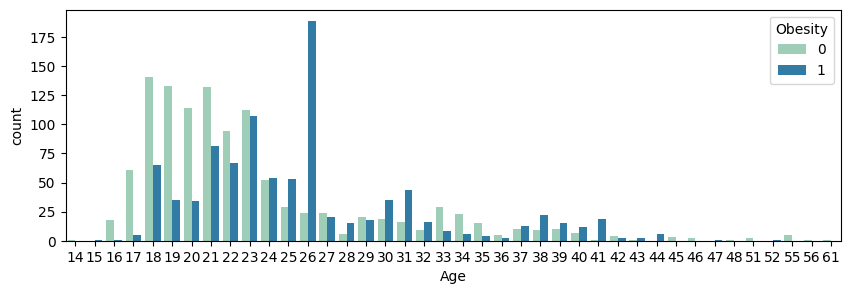

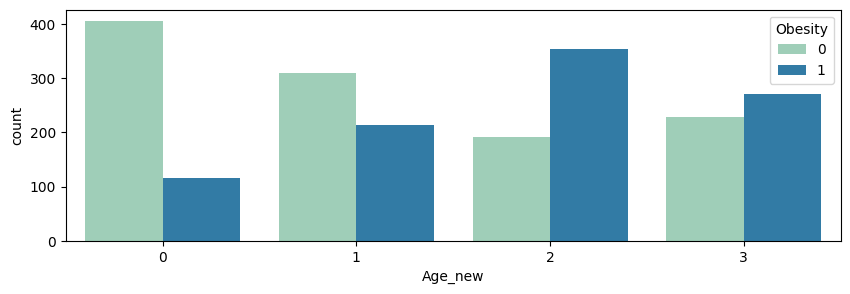

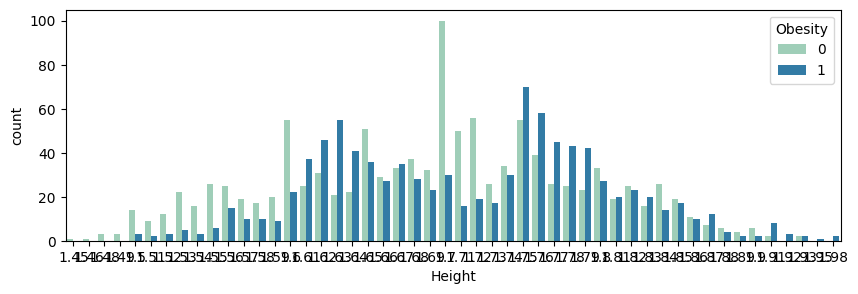

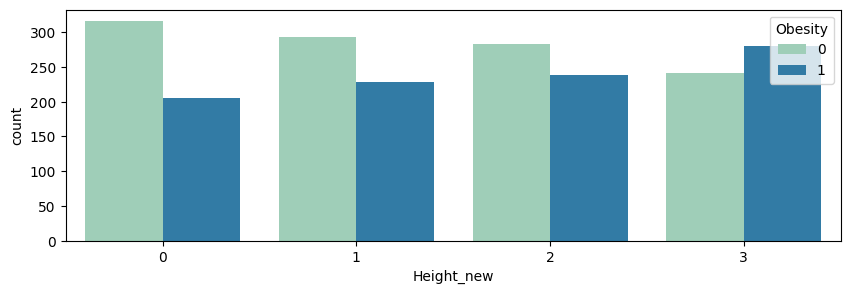

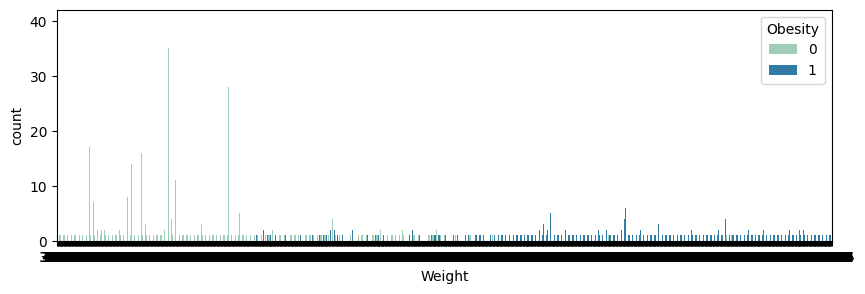

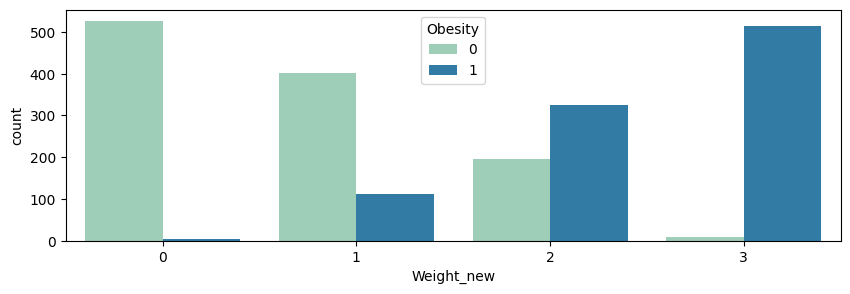

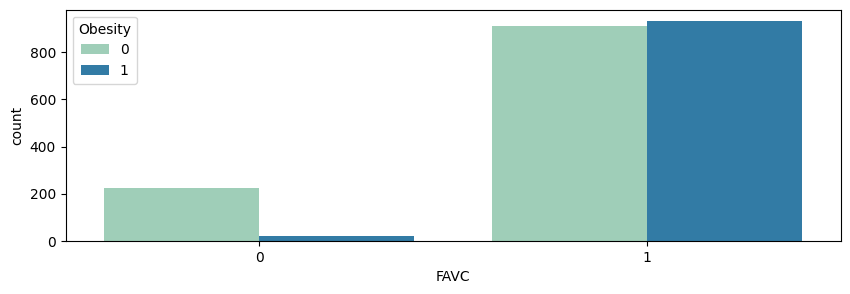

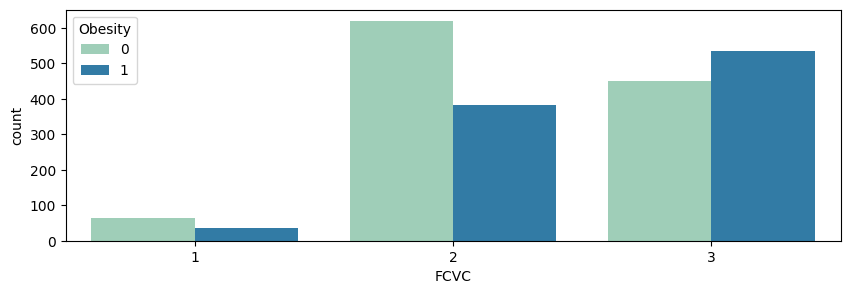

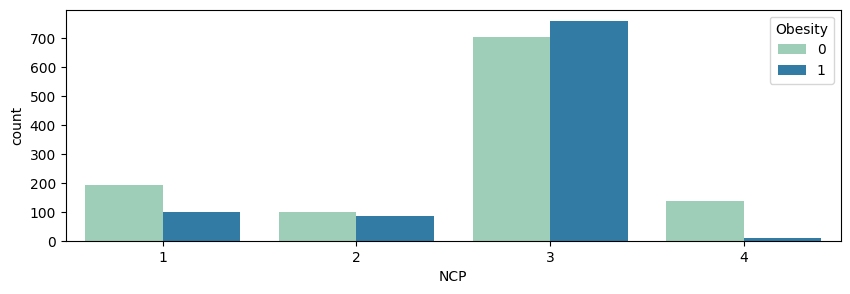

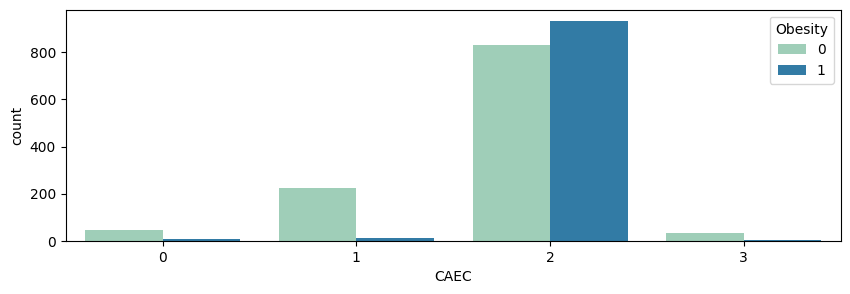

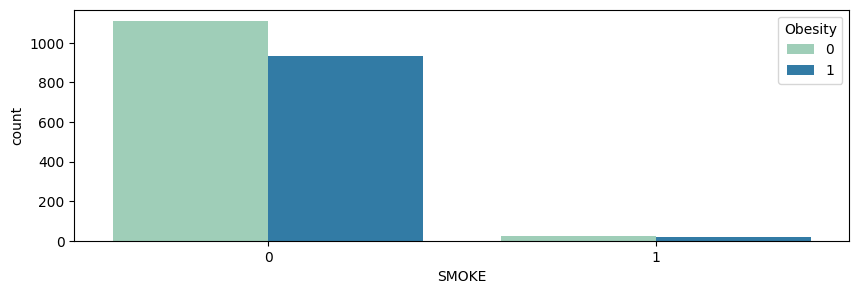

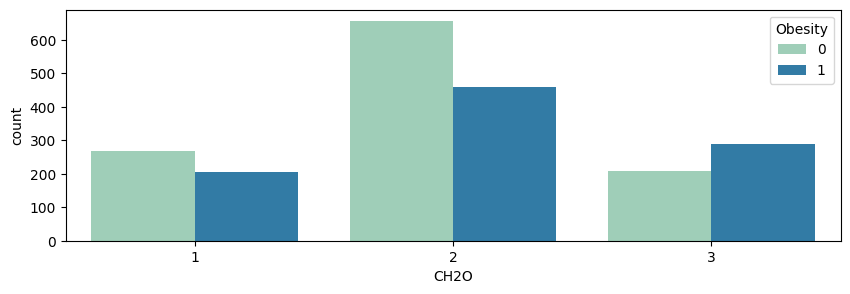

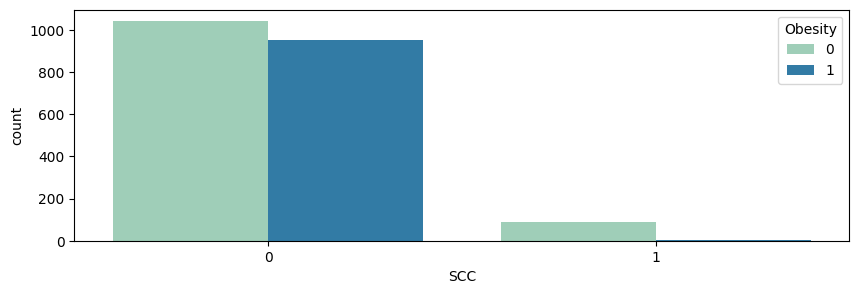

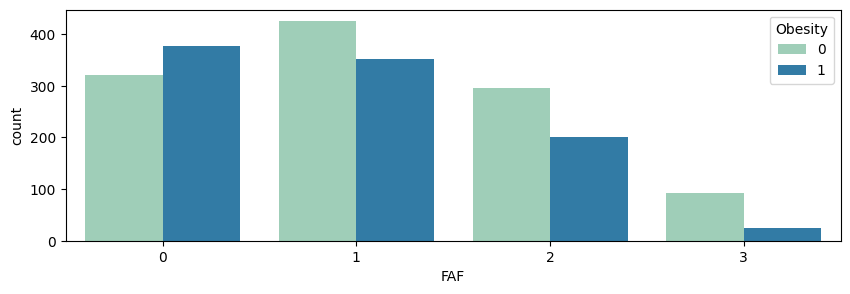

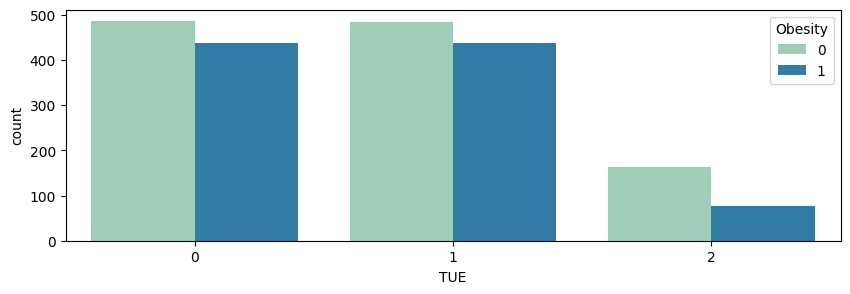

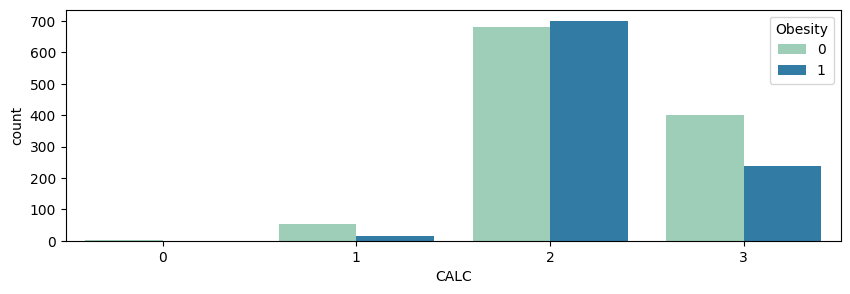

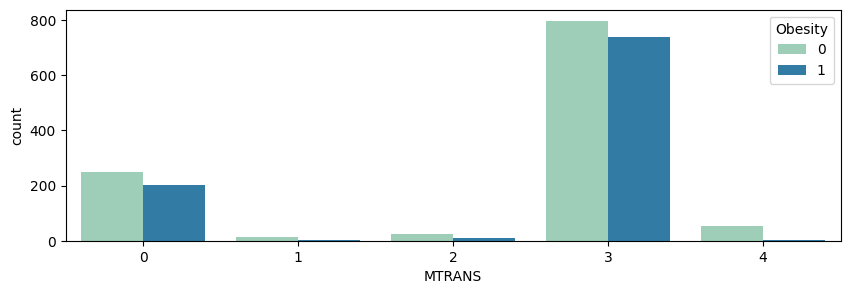

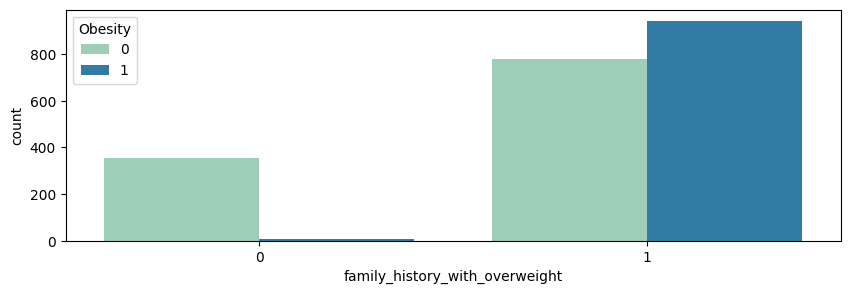

In [50]:
# # Crear un nuevo DataFrame dataTest copiando el DataFrame data2
# dataTest = data2.copy()

# # Reemplazar los valores 1 por 'Obesity' y 0 por 'No Obesity' en la columna 'Obesity' del DataFrame dataTest
# dataTest['Obesity'] = dataTest['Obesity'].replace({1: 'Obesity', 0: 'No Obesity'})

# for col in nuevo_orden_de_columnas:
#   plt.figure(figsize=(10,3))
#   sns.countplot(data=dataTest, x=col, hue="Obesity", palette="YlGnBu")
#   plt.show()

for col in nuevo_orden_de_columnas:
  plt.figure(figsize=(10,3))
  sns.countplot(data=data2, x=col, hue="Obesity", palette="YlGnBu")
  plt.show()

In [51]:
data2

,Obesity,NObeyesdad,Gender,Age,Age_new,Height,Height_new,Weight,Weight_new,FAVC,...,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,Normal_Weight,0,21,1,1.62,0,64.00,0,0,...,3,2,0,2,0,0,1,3,3,1
1,0,Normal_Weight,0,21,1,1.52,0,56.00,0,0,...,3,2,1,3,1,3,0,2,3,1
2,0,Normal_Weight,1,23,2,1.80,3,77.00,1,0,...,3,2,0,2,0,2,1,1,3,1
3,0,Overweight_Level_I,1,27,3,1.80,3,87.00,2,0,...,3,2,0,2,0,2,0,1,4,0
4,0,Normal_Weight,1,22,1,1.78,3,73.33,1,0,...,1,2,0,2,0,2,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,Obesity_Type_III,0,21,1,1.71,2,131.41,3,1,...,3,2,0,2,0,2,1,2,3,1
2107,1,Obesity_Type_III,0,22,1,1.75,2,133.74,3,1,...,3,2,0,2,0,1,1,2,3,1
2108,1,Obesity_Type_III,0,23,1,1.75,2,133.69,3,1,...,3,2,0,2,0,1,1,2,3,1
2109,1,Obesity_Type_III,0,24,2,1.74,2,133.35,3,1,...,3,2,0,3,0,1,1,2,3,1


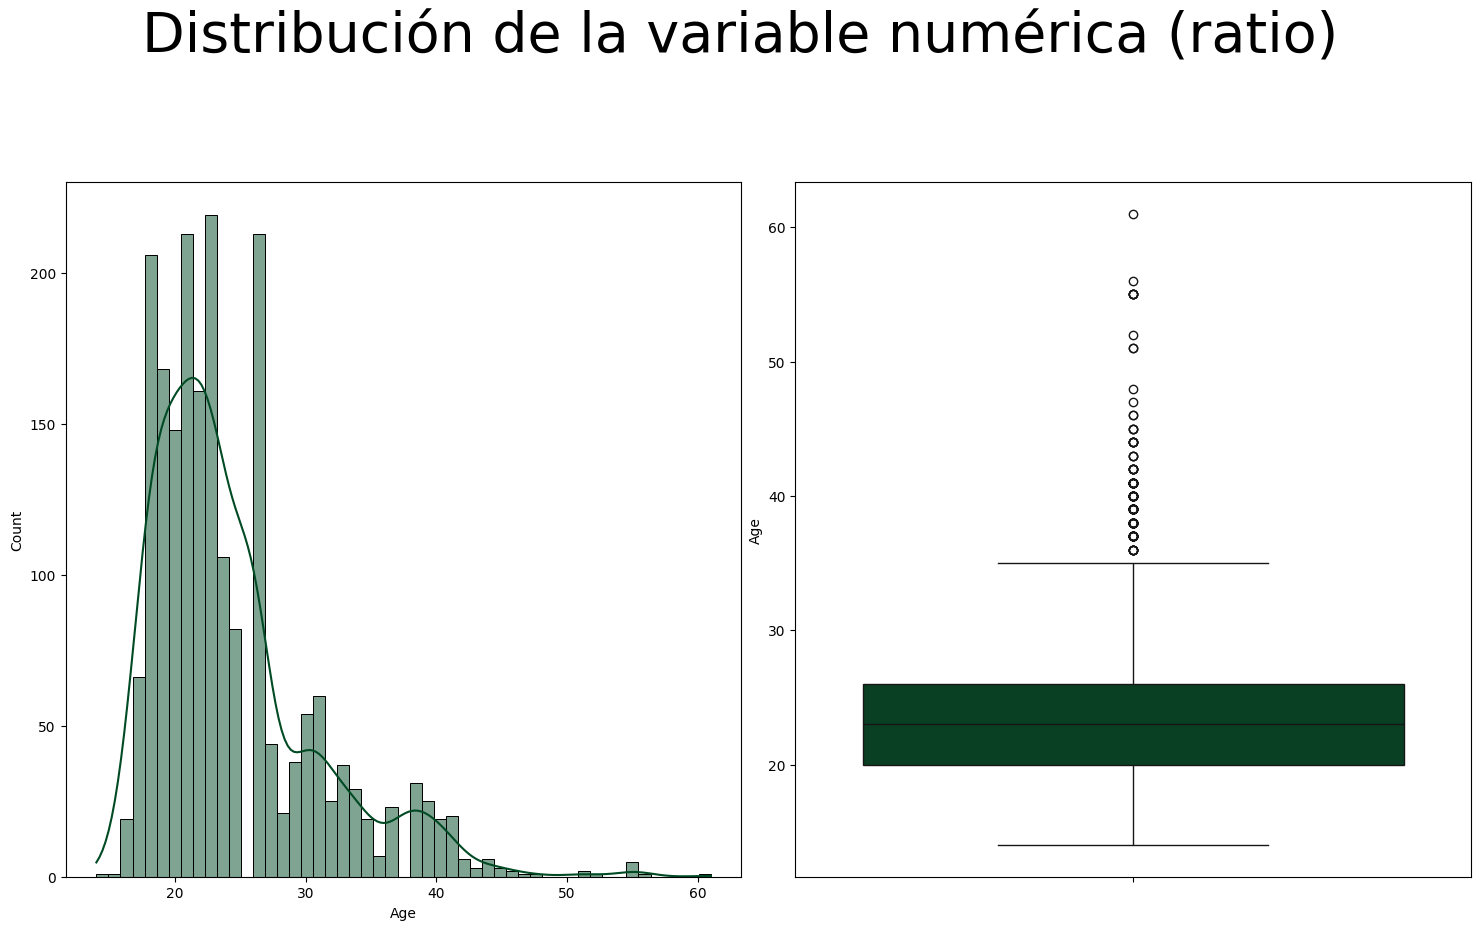

In [52]:
sns.set_palette("ocean")

# ratio variable distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.histplot(data2["Age"], kde=True, ax=axes[0])
sns.boxplot(data2.Age, ax=axes[1])

# Mostrar la figura y los gráficos
fig.suptitle("Distribución de la variable numérica (ratio)", fontsize=40)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()


/var/folders/w6/ng560w991vj7bwd_cwcr9m1m0000gn/T/ipykernel_68857/3667613052.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


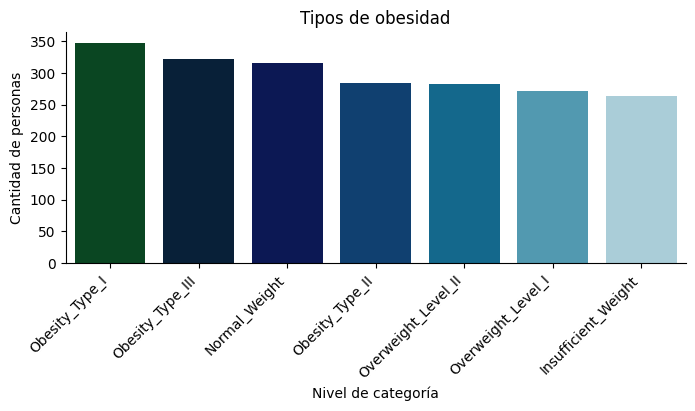

In [53]:
plt.figure(figsize=(8, 3))

# Define plot
ax = sns.countplot(x="NObeyesdad", palette="ocean", order=data2.NObeyesdad.value_counts().index,
                   data=data2)

plt.title("Tipos de obesidad")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Labels for x and y
plt.xlabel("Nivel de categoría")
plt.ylabel("Cantidad de personas")

# Turn off top and right frame lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show plot
plt.show()


In [54]:
data3

,Obesity,Gender,Age_new,Height_new,Weight_new,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,0,1,0,0,0,2,3,2,0,2,0,0,1,3,3,1
1,0,0,1,0,0,0,3,3,2,1,3,1,3,0,2,3,1
2,0,1,2,3,1,0,2,3,2,0,2,0,2,1,1,3,1
3,0,1,3,3,2,0,3,3,2,0,2,0,2,0,1,4,0
4,0,1,1,3,1,0,2,1,2,0,2,0,2,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,1,2,3,1,3,3,2,0,2,0,2,1,2,3,1
2107,1,0,1,2,3,1,3,3,2,0,2,0,1,1,2,3,1
2108,1,0,1,2,3,1,3,3,2,0,2,0,1,1,2,3,1
2109,1,0,2,2,3,1,3,3,2,0,3,0,1,1,2,3,1


In [55]:
# Create correlation matrix
corr_matrix = data3.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features from correlation matrix
reduced_corr_matrix = corr_matrix.drop(columns=to_drop, index=to_drop)

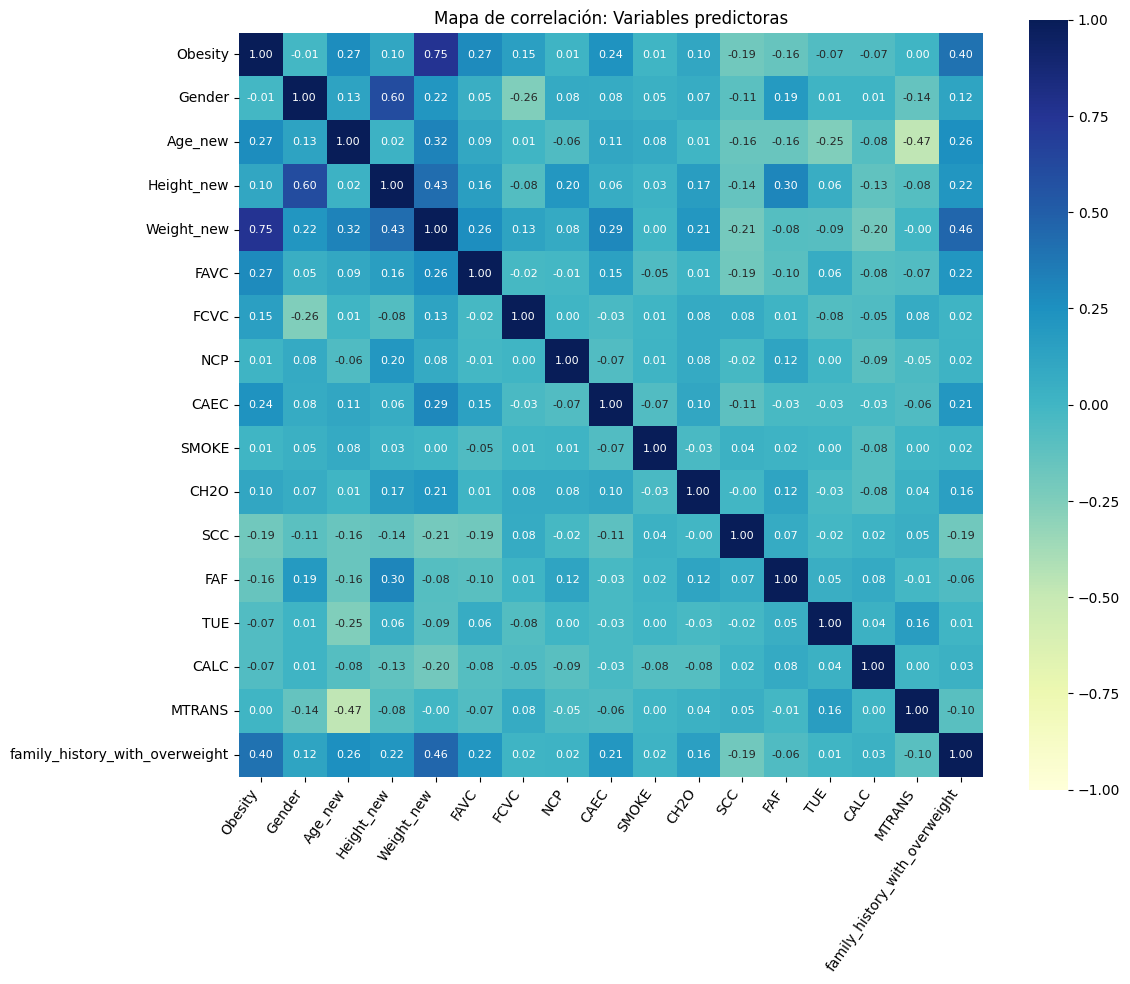

In [56]:
# Plot heatmap of reduced correlation matrix
plt.figure(figsize=(12, 10))
ax = sns.heatmap(reduced_corr_matrix, annot=True, fmt='.2f', cmap="YlGnBu",
                 vmin=-1, vmax=1, center=0, square=True, annot_kws={"size": 8})

plt.title("Mapa de correlación: Variables predictoras")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right')
plt.show()


## Selección de 1000 instancias usando mi seed

In [57]:
data3.head()

,Obesity,Gender,Age_new,Height_new,Weight_new,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,family_history_with_overweight
0,0,0,1,0,0,0,2,3,2,0,2,0,0,1,3,3,1
1,0,0,1,0,0,0,3,3,2,1,3,1,3,0,2,3,1
2,0,1,2,3,1,0,2,3,2,0,2,0,2,1,1,3,1
3,0,1,3,3,2,0,3,3,2,0,2,0,2,0,1,4,0
4,0,1,1,3,1,0,2,1,2,0,2,0,2,0,2,3,0


In [58]:
# Obtén una muestra aleatoria de 1000 instancias usando la semilla
data4 = data3.sample(n=1000, random_state=seed)

In [59]:
data4.shape

(1000, 17)

# Modelos

In [60]:
X = data4.drop('Obesity', axis=1)
Y = data4['Obesity']

# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=Y)

# Crea un StandardScaler
scaler = StandardScaler()

# Ajusta el scaler al conjunto de entrenamiento y transforma tanto el conjunto de entrenamiento como el de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

porcentaje_y_total = pd.Series(Y).value_counts(normalize=True) * 100
verificacion_y_train = pd.Series(Y_train).value_counts(normalize=True) * 100
verificacion_y_test = pd.Series(Y_test).value_counts(normalize=True) * 100

print('--------------------------------------------------------------------')
print('Distribución en % de la variable objetivo                          |')
print('--------------------------------------------------------------------')
print(porcentaje_y_total)
print('--------------------------------------------------------------------')
print('Distribución en % de la variable objetivo después de la división de datos |')
print('--------------------------------------------------------------------')
print('Train:')
print(verificacion_y_train)
print('----------------')
print('Test:')
print(verificacion_y_test)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Distribución en % de la variable objetivo                          |
--------------------------------------------------------------------
0    53.7
1    46.3
Name: Obesity, dtype: float64
--------------------------------------------------------------------
Distribución en % de la variable objetivo después de la división de datos |
--------------------------------------------------------------------
Train:
0    53.75
1    46.25
Name: Obesity, dtype: float64
----------------
Test:
0    53.5
1    46.5
Name: Obesity, dtype: float64
--------------------------------------------------------------------


## Apartado 1

### Regresión Logística

In [61]:
# Define el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escala los datos
    ('logreg', LogisticRegression()),  # Regresión Logística
])

# Define los parámetros para la búsqueda de hiperparámetros
param_grid_logreg = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear'],
}

# Aplica GridSearchCV para encontrar los mejores parámetros para la regresión logística
grid_search_logreg = GridSearchCV(pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy')

In [62]:
# Muestra los mejores parámetros de la regresión logística
print("Mejores parámetros para Regresión Logística:", grid_search_logreg.best_params_)

# Evalúa el rendimiento del modelo de regresión logística en el conjunto de prueba
y_pred_logreg = grid_search_logreg.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, y_pred_logreg)
print(f"Accuracy en Regresión Logística: {accuracy_logreg * 100:.2f}%")

Mejores parámetros para Regresión Logística: {'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy en Regresión Logística: 92.50%


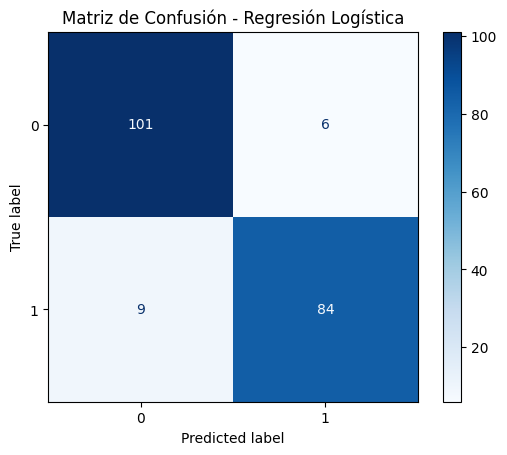

In [63]:
# Grafica la matriz de confusión para la regresión logística
cm_logreg = confusion_matrix(Y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=grid_search_logreg.classes_)
disp_logreg.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

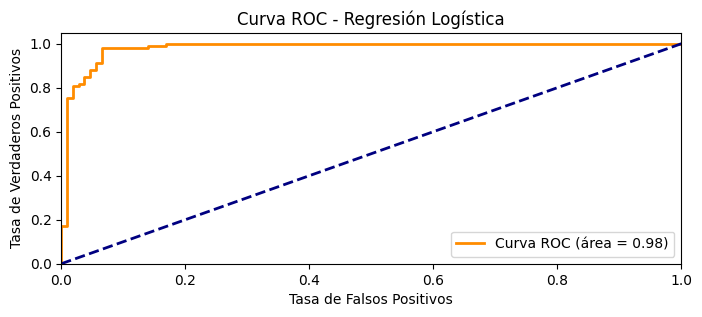

In [64]:
# Obtén las probabilidades predichas del modelo de regresión logística en el conjunto de prueba
y_probs = grid_search_logreg.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()


In [65]:
# Predecir en los conjuntos de entrenamiento y prueba
y_pred_train = grid_search_logreg.predict(X_train)
y_pred_test = grid_search_logreg.predict(X_test)

# Calcular la precisión en ambos conjuntos
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred_test)

# Imprimir las precisiones
print('--------------------------------------------------------------------')
print('Prueba para verificar si existe Overfitting en el modelo           |')
print('--------------------------------------------------------------------')
print(f"Accuracy en el conjunto de train: {accuracy_train * 100:.2f}%")
print(f"Accuracy en el conjunto de test: {accuracy_test * 100:.2f}%")
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Prueba para verificar si existe Overfitting en el modelo           |
--------------------------------------------------------------------
Accuracy en el conjunto de train: 89.00%
Accuracy en el conjunto de test: 92.50%
--------------------------------------------------------------------


### Red Neuronal en base a la regresión logística

In [66]:
# Obtiene las variables seleccionadas por la regresión logística
selected_features_train = SelectFromModel(grid_search_logreg.best_estimator_.named_steps['logreg']).transform(X_train)
selected_features_test = SelectFromModel(grid_search_logreg.best_estimator_.named_steps['logreg']).transform(X_test)

# Define el nuevo pipeline con la red neuronal y las variables seleccionadas
pipeline_neural = Pipeline([
    ('scaler', StandardScaler()),
    ('neuralNetwork1', MLPClassifier())
])

# Define los parámetros para la búsqueda de hiperparámetros de la red neuronal
param_grid_neural = {
    'neuralNetwork1__hidden_layer_sizes': [(15,), (17,), (20,), (25,)],
    'neuralNetwork1__activation': ['logistic', 'tanh', 'relu'],
    'neuralNetwork1__solver': ['adam', 'sgd', 'lbfgs'],
    'neuralNetwork1__alpha': [0.01, 0.01, 0.1]
}

# Aplica GridSearchCV para encontrar los mejores parámetros para la red neuronal
grid_search_neural = GridSearchCV(pipeline_neural, param_grid_neural, cv=5, scoring='accuracy')
grid_search_neural.fit(selected_features_train, Y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neuralNetwork1', MLPClassifier())]),
             param_grid={'neuralNetwork1__activation': ['logistic', 'tanh',
                                                        'relu'],
                         'neuralNetwork1__alpha': [0.01, 0.01, 0.1],
                         'neuralNetwork1__hidden_layer_sizes': [(15,), (17,),
                                                                (20,), (25,)],
                         'neuralNetwork1__solver': ['adam', 'sgd', 'lbfgs']},
             scoring='accuracy')

In [67]:
# Muestra los mejores parámetros de la red neuronal
best_params_neural = grid_search_neural.best_params_
print('--------------------------------------------------------------------')
print("Mejores parámetros para Red Neuronal:                              |")
print('--------------------------------------------------------------------')
for param, value in best_params_neural.items():
    print(f"{param}: {value}")

# Predecir en los conjuntos de entrenamiento y prueba para Red Neuronal
X_train_selected = SelectFromModel(grid_search_logreg.best_estimator_.named_steps['logreg']).transform(X_train)
X_test_selected = SelectFromModel(grid_search_logreg.best_estimator_.named_steps['logreg']).transform(X_test)
y_pred_train = grid_search_neural.predict(X_train_selected)
y_pred_test = grid_search_neural.predict(X_test_selected)

# Calcular la precisión en ambos conjuntos para Red Neuronal
accuracy_train_neural = accuracy_score(Y_train, y_pred_train)
accuracy_test_neural = accuracy_score(Y_test, y_pred_test)

# Imprimir las precisiones para Red Neuronal
print('--------------------------------------------------------------------')
print('Prueba para verificar si existe Overfitting en la Red Neuronal     |')
print('--------------------------------------------------------------------')
print(f"Accuracy en el conjunto de train (Neuronal): {accuracy_train_neural * 100:.2f}%")
print(f"Accuracy en el conjunto de test (Neuronal): {accuracy_test_neural * 100:.2f}%")
print('--------------------------------------------------------------------')


--------------------------------------------------------------------
Mejores parámetros para Red Neuronal:                              |
--------------------------------------------------------------------
neuralNetwork1__activation: tanh
neuralNetwork1__alpha: 0.1
neuralNetwork1__hidden_layer_sizes: (25,)
neuralNetwork1__solver: lbfgs
--------------------------------------------------------------------
Prueba para verificar si existe Overfitting en la Red Neuronal     |
--------------------------------------------------------------------
Accuracy en el conjunto de train (Neuronal): 99.75%
Accuracy en el conjunto de test (Neuronal): 97.00%
--------------------------------------------------------------------


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


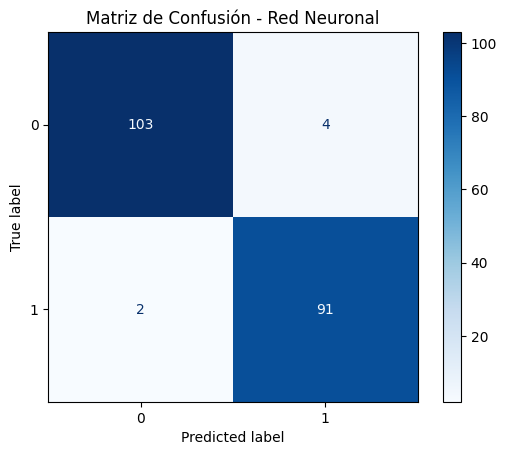

In [68]:
# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_neural.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()


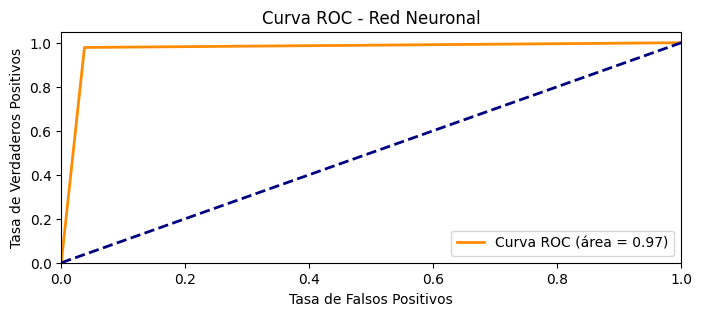

In [69]:
# AUC-ROC para Red Neuronal
fpr, tpr, _ = roc_curve(Y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC para Red Neuronal
plt.figure(figsize=(8, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Red Neuronal')
plt.legend(loc="lower right")
plt.show()

## Apartado 2

### SelectKBest y Red Neuronal

In [70]:
# Crea el pipeline para el SelectKBest y la Red Neuronal
pipeline = Pipeline([
    ('scaler2', StandardScaler()),
    ('k_best', SelectKBest(score_func=f_classif, k=4)),
    ('neuralNetwork2', MLPClassifier(random_state=seed))
])

# Combinaciones de parámetros a probar
param_grid_neural = {
    'neuralNetwork2__hidden_layer_sizes': [(15,), (20), (25)],
    'neuralNetwork2__activation': ['logistic', 'tanh', 'relu'],
    'neuralNetwork2__solver': ['adam', 'sgd', 'lbfgs'],
    'neuralNetwork2__alpha': [0.00001, 0.0001, 0.01]
}

# Combina el pipeline con el GridSearchCV
grid_search_neural = GridSearchCV(pipeline, param_grid_neural, cv=5, scoring='roc_auc')
grid_search_neural.fit(X_train, Y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler2', StandardScaler()),
                                       ('k_best', SelectKBest(k=4)),
                                       ('neuralNetwork2',
                                        MLPClassifier(random_state=2313))]),
             param_grid={'neuralNetwork2__activation': ['logistic', 'tanh',
                                                        'relu'],
                         'neuralNetwork2__alpha': [1e-05, 0.0001, 0.01],
                         'neuralNetwork2__hidden_layer_sizes': [(15,), 20, 25],
                         'neuralNetwork2__solver': ['adam', 'sgd', 'lbfgs']},
             scoring='roc_auc')

In [71]:
# Muestra los mejores parámetros de la red neuronal
best_params_neural = grid_search_neural.best_params_

print('--------------------------------------------------------------------')
print('Mejores parámetros para Red Neuronal:                              |')
print('--------------------------------------------------------------------')
for param, value in best_params_neural.items():
    print(f"{param}: {value}")
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Mejores parámetros para Red Neuronal:                              |
--------------------------------------------------------------------
neuralNetwork2__activation: relu
neuralNetwork2__alpha: 1e-05
neuralNetwork2__hidden_layer_sizes: 20
neuralNetwork2__solver: adam
--------------------------------------------------------------------


In [72]:
# Prueba para verificar si existe Overfitting en el modelo

# Predice en el conjunto de train con el mejor modelo encontrado
y_pred_train_best = grid_search_neural.predict(X_train)
accuracy_train_best = accuracy_score(Y_train, y_pred_train_best)

# Predice en el conjunto de test con el mejor modelo encontrado
y_pred_test_best = grid_search_neural.predict(X_test)
accuracy_test_best = accuracy_score(Y_test, y_pred_test_best)

print('--------------------------------------------------------------------')
print('Prueba para verificar si existe Overfitting en el modelo           |')
print('--------------------------------------------------------------------')
print(f"Accuracy en el conjunto de train: {accuracy_train_best * 100:.2f}%")
print(f"Accuracy en el conjunto de test: {accuracy_test_best * 100:.2f}%")
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Prueba para verificar si existe Overfitting en el modelo           |
--------------------------------------------------------------------
Accuracy en el conjunto de train: 86.00%
Accuracy en el conjunto de test: 88.50%
--------------------------------------------------------------------


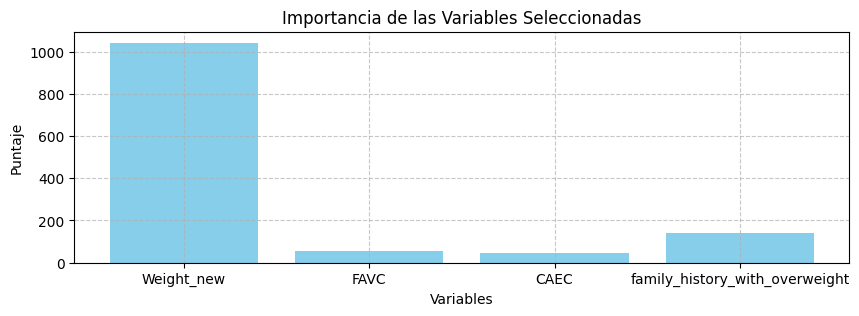

In [73]:
# Obtener las características seleccionadas por KBest
selected_features = X_train.columns[grid_search_neural.best_estimator_.named_steps['k_best'].get_support()]

# Gráfico de barras para mostrar las características seleccionadas
plt.figure(figsize=(10, 3))
plt.bar(selected_features, grid_search_neural.best_estimator_.named_steps['k_best'].scores_[grid_search_neural.best_estimator_.named_steps['k_best'].get_support()], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Puntaje')
plt.title('Importancia de las Variables Seleccionadas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [74]:
# Normalizar los puntajes para que sumen 100
normalized_scores = grid_search_neural.best_estimator_.named_steps['k_best'].scores_[grid_search_neural.best_estimator_.named_steps['k_best'].get_support()] / grid_search_neural.best_estimator_.named_steps['k_best'].scores_[grid_search_neural.best_estimator_.named_steps['k_best'].get_support()].sum() * 100

print('--------------------------------------------------------------------')
print('El peso que tiene cada variable en porcentaje                      |')
print('--------------------------------------------------------------------')
# Imprimir porcentajes de características seleccionadas
for feature, normalized_score in zip(selected_features, normalized_scores):
    print(f"{feature}: {normalized_score:.2f}%")


--------------------------------------------------------------------
El peso que tiene cada variable en porcentaje                      |
--------------------------------------------------------------------
Weight_new: 81.16%
FAVC: 4.42%
CAEC: 3.60%
family_history_with_overweight: 10.83%


---
Las 4 variables que estoy obteniendo tienen sentido, pues:
* Obesidad (Weight): Desdes el heatmap se veía que tenia una alta correlación con la variable de sobrepeso, además tiene lógica simple.

* Y un historial familiar con antecedentes de con enfermedades cardiovasculares (family_history_with_overweight): Si toda la familia sufre del mismo problema y encima los hábitos se comparten, pues tiene lógica también que sea la segunda variable con mayor peso.

* El consumo de alimentos con alto contenido calórico (FAVC): Las calorías son una de las cosas que mas nos hacen engordar, tiene lógica que la variable este acá.

* Consumo de comida entre las comidas (CAEC): A mayor cantidad de comida ingerida tiene sentido que la persona gane más peso.



Estas variables corresponen de manera lógica a la obesidad en las personas.

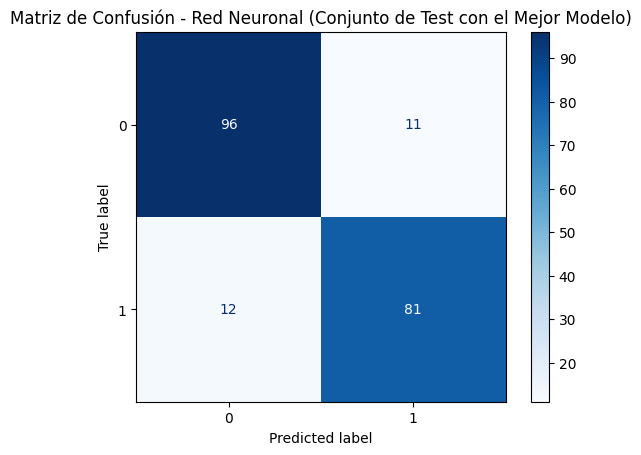

In [75]:
# Calcular la matriz de confusión en el conjunto de test con el mejor modelo encontrado
cm_best = confusion_matrix(Y_test, y_pred_test_best)

# Graficar la matriz de confusión
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=grid_search_neural.best_estimator_.classes_)
disp_best.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Red Neuronal (Conjunto de Test con el Mejor Modelo)')
plt.show()


--------------------------------------------------------------------
AUC del modelo de red neuronal en el conjunto de test con el mejor modelo: 95.2517%
--------------------------------------------------------------------


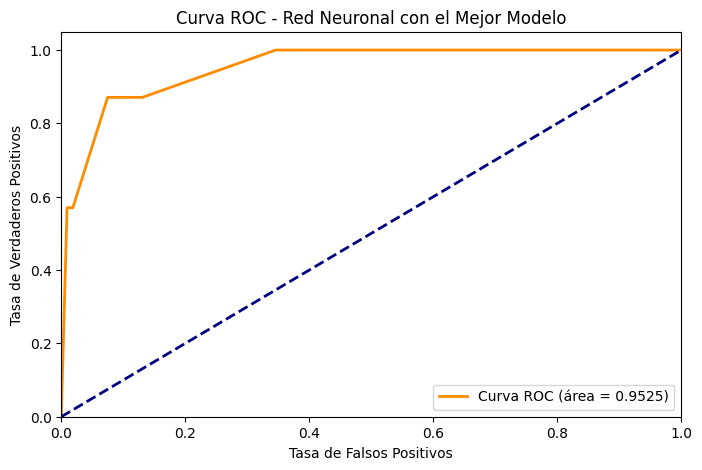

In [76]:
# Predice en el conjunto de test con el mejor modelo encontrado
y_pred_test_best = grid_search_neural.best_estimator_.predict(X_test)

# Calcular la probabilidad de la clase positiva en el conjunto de test
y_scores_test = grid_search_neural.best_estimator_.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr)
fpr, tpr, _ = roc_curve(Y_test, y_scores_test)

# Calcular el AUC para el modelo de red neuronal usando probabilidades
roc_auc = auc(fpr, tpr)
print('--------------------------------------------------------------------')
print(f"AUC del modelo de red neuronal en el conjunto de test con el mejor modelo: {roc_auc * 100:.4f}%")
print('--------------------------------------------------------------------')

# Graficar la Curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Red Neuronal con el Mejor Modelo')
plt.legend(loc="lower right")
plt.show()


## Apartado 4

### Busqueda paramétrica para lograr el mejor Árbol

In [77]:
# Crear el pipeline para el árbol de decisiones
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(random_state=seed))
])

# Parámetros a probar para el árbol de decisiones
param_grid_tree = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [None, 5, 10, 15],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4, 6, 7]
}

# Métodos de validación de la bondad de la clasificación
scoring_methods = ['accuracy', 'precision', 'recall', 'roc_auc']

In [78]:
def visualize_tree(best_tree, feature_names):
    # Visualizar las reglas del árbol en formato texto
    tree_rules = export_text(best_tree, feature_names=list(feature_names))
    print('Reglas del Árbol:\n', tree_rules)

    # Graficar la importancia de las variables
    importances = best_tree.feature_importances_
    indices = importances.argsort()[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Importancia')
    plt.title('Importancia de las Variables en el Árbol')
    plt.show()

def perform_grid_search(X_train, Y_train, X_test, Y_test, param_grid):
    best_model = None
    best_metric_value = 0
    best_metric_name = ""

    for scoring_method in scoring_methods:
        # Configurar el GridSearchCV con el scoring_method específico
        grid_search_tree = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring=scoring_method)

        # Ajustar el modelo
        grid_search_tree.fit(X_train, Y_train)

        # Predicciones en el conjunto de prueba
        y_pred_tree_test = grid_search_tree.predict(X_test)

        # Calcular la métrica en el conjunto de prueba
        if scoring_method == 'roc_auc':
            metric_value = roc_auc_score(Y_test, y_pred_tree_test)
        else:
            metric_value = grid_search_tree.score(X_test, Y_test)

        print(f'-> {scoring_method} <- en el conjunto de prueba: {metric_value * 100:.2f}%')

        # Actualizar el mejor modelo si la métrica es mejor
        if metric_value > best_metric_value:
            best_metric_value = metric_value
            best_model = grid_search_tree.best_estimator_.named_steps['tree']
            best_metric_name = scoring_method

    # Imprimir el modelo ganador
    print('')
    print('--------------------------------------------------------------------')
    print(f'El modelo ganador es "{best_metric_name}" con {best_metric_value * 100:.2f}%')
    print('--------------------------------------------------------------------')
    print('')
    print('')

    # Visualizar el árbol ganador y sus características
    plt.figure(figsize=(15, 8))
    plot_tree(best_model, feature_names=X_train.columns, filled=True, class_names=['0', '1'])
    plt.title(f'Árbol de Decisiones - Modelo "{best_metric_name}" con {best_metric_value * 100:.2f}%')
    plt.show()

    # Visualizar las reglas del árbol y la importancia de las variables
    print('')
    print('')
    print('--------------------------------------------------------------------')
    visualize_tree(best_model, X_train.columns)


-> accuracy <- en el conjunto de prueba: 91.50%
-> precision <- en el conjunto de prueba: 88.89%
-> recall <- en el conjunto de prueba: 93.55%
-> roc_auc <- en el conjunto de prueba: 93.64%

--------------------------------------------------------------------
El modelo ganador es "roc_auc" con 93.64%
--------------------------------------------------------------------




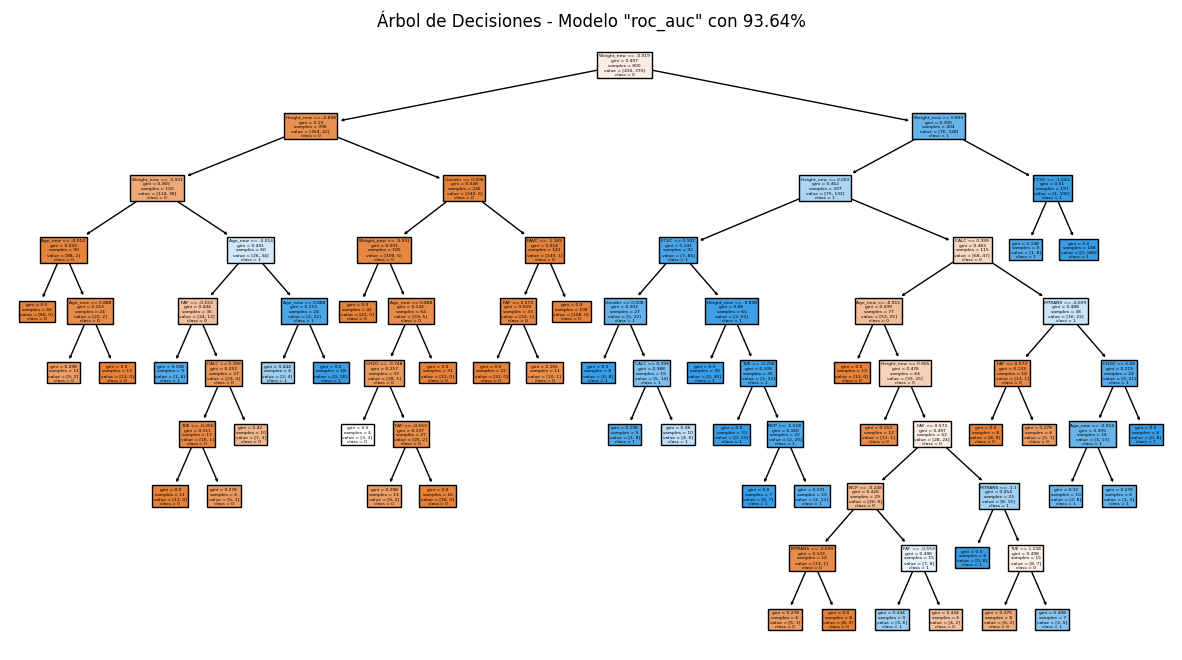



--------------------------------------------------------------------
Reglas del Árbol:
 |--- Weight_new <= -0.02
|   |--- Height_new <= -0.90
|   |   |--- Weight_new <= -0.93
|   |   |   |--- Age_new <= -0.01
|   |   |   |   |--- class: 0
|   |   |   |--- Age_new >  -0.01
|   |   |   |   |--- Age_new <= 0.89
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age_new >  0.89
|   |   |   |   |   |--- class: 0
|   |   |--- Weight_new >  -0.93
|   |   |   |--- Age_new <= -0.01
|   |   |   |   |--- FAF <= -0.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- FAF >  -0.55
|   |   |   |   |   |--- CALC <= 0.40
|   |   |   |   |   |   |--- TUE <= -0.26
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- TUE >  -0.26
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CALC >  0.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age_new >  -0.01
|   |   |   |   |--- Age_new <= 0.89
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age_ne

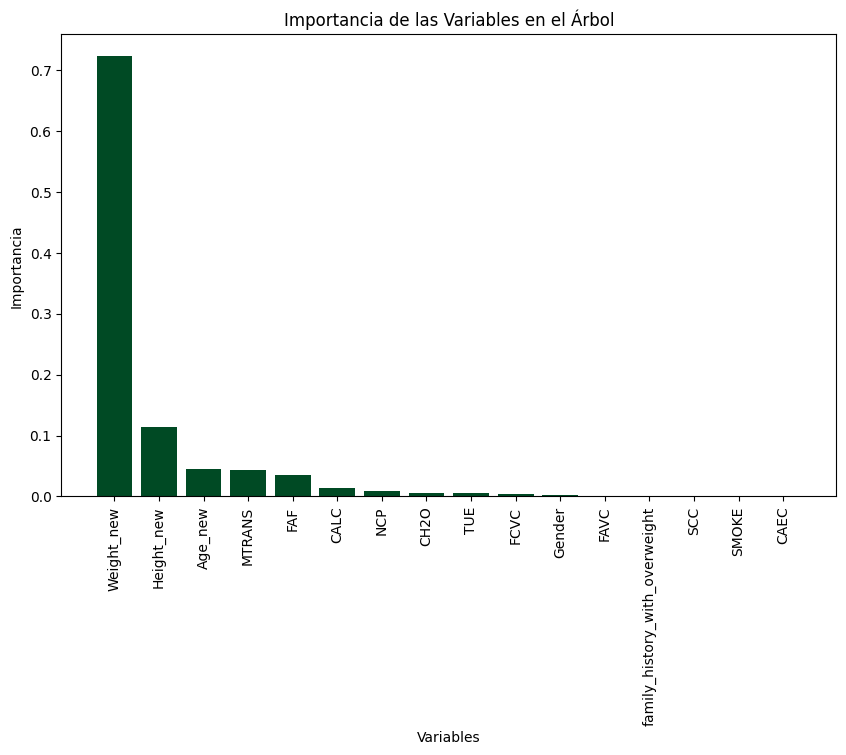

In [79]:
# Realizar la búsqueda paramétrica con GridSearchCV para cada método de validación
perform_grid_search(X_train, Y_train, X_test, Y_test, param_grid_tree)


## Apartado 5

### Modelo de Bagging

In [80]:
# Parámetros a probar para Bagging
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

def perform_grid_search_bagging(X_train, Y_train, X_test, Y_test, param_grid, num_top_models=3):
    models_and_accuracies = []

    for n_estimators in param_grid['n_estimators']:
        for max_samples in param_grid['max_samples']:
            for max_features in param_grid['max_features']:
                # Crear el modelo Bagging con los parámetros actuales
                bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=seed),
                                                  n_estimators=n_estimators,
                                                  max_samples=max_samples,
                                                  max_features=max_features,
                                                  random_state=seed)

                # Entrenar el modelo
                bagging_model.fit(X_train, Y_train)

                # Calcular la precisión en el conjunto de prueba
                accuracy = accuracy_score(Y_test, bagging_model.predict(X_test))

                # Almacenar el modelo y su precisión
                models_and_accuracies.append((bagging_model, accuracy))

    # Ordenar los modelos por precisión de mayor a menor
    models_and_accuracies.sort(key=lambda x: x[1], reverse=True)

    # Imprimir los mejores modelos y sus parámetros
    for i, (model, accuracy) in enumerate(models_and_accuracies[:num_top_models], start=1):
        params = model.get_params()
        print(f'Modelo {i}:')
        print(f'   Precisión: {accuracy * 100:.2f}%')
        print('   Parámetros:')
        for key, value in params.items():
            print(f'      {key}: {value}')
        print()

    return models_and_accuracies[:num_top_models]

In [81]:
# Realizar la búsqueda paramétrica para Bagging
best_bagging_models = perform_grid_search_bagging(X_train, Y_train, X_test, Y_test, param_grid_bagging, num_top_models=3)


Modelo 1:
   Precisión: 97.50%
   Parámetros:
      base_estimator__ccp_alpha: 0.0
      base_estimator__class_weight: None
      base_estimator__criterion: gini
      base_estimator__max_depth: None
      base_estimator__max_features: None
      base_estimator__max_leaf_nodes: None
      base_estimator__min_impurity_decrease: 0.0
      base_estimator__min_samples_leaf: 1
      base_estimator__min_samples_split: 2
      base_estimator__min_weight_fraction_leaf: 0.0
      base_estimator__random_state: 2313
      base_estimator__splitter: best
      base_estimator: DecisionTreeClassifier(random_state=2313)
      bootstrap: True
      bootstrap_features: False
      estimator: None
      max_features: 0.5
      max_samples: 0.5
      n_estimators: 100
      n_jobs: None
      oob_score: False
      random_state: 2313
      verbose: 0
      warm_start: False

Modelo 2:
   Precisión: 97.50%
   Parámetros:
      base_estimator__ccp_alpha: 0.0
      base_estimator__class_weight: None
      ba

### Modelo de Random Forest

In [82]:
# Parámetros a probar para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

def perform_grid_search_rf(X_train, Y_train, X_test, Y_test, param_grid, num_top_models=3):
    models_and_accuracies = []

    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                        # Crear el modelo Random Forest con los parámetros actuales
                        rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          max_features=max_features,
                                                          random_state=seed)

                        # Entrenar el modelo
                        rf_model.fit(X_train, Y_train)

                        # Calcular la precisión en el conjunto de prueba
                        accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

                        # Almacenar el modelo y su precisión
                        models_and_accuracies.append((rf_model, accuracy))

    # Ordenar los modelos por precisión de mayor a menor
    models_and_accuracies.sort(key=lambda x: x[1], reverse=True)

    # Imprimir los mejores modelos y sus parámetros
    for i, (model, accuracy) in enumerate(models_and_accuracies[:num_top_models], start=1):
        params = model.get_params()
        print(f'Modelo {i}:')
        print(f'   Precisión: {accuracy * 100:.2f}%')
        print('   Parámetros:')
        for key, value in params.items():
            print(f'      {key}: {value}')
        print()

    return models_and_accuracies[:num_top_models]

In [83]:
# Realizar la búsqueda paramétrica para Random Forest
best_rf_models = perform_grid_search_rf(X_train, Y_train, X_test, Y_test, param_grid_rf, num_top_models=3)


Modelo 1:
   Precisión: 98.00%
   Parámetros:
      bootstrap: True
      ccp_alpha: 0.0
      class_weight: None
      criterion: gini
      max_depth: None
      max_features: auto
      max_leaf_nodes: None
      max_samples: None
      min_impurity_decrease: 0.0
      min_samples_leaf: 2
      min_samples_split: 5
      min_weight_fraction_leaf: 0.0
      n_estimators: 50
      n_jobs: None
      oob_score: False
      random_state: 2313
      verbose: 0
      warm_start: False

Modelo 2:
   Precisión: 98.00%
   Parámetros:
      bootstrap: True
      ccp_alpha: 0.0
      class_weight: None
      criterion: gini
      max_depth: None
      max_features: sqrt
      max_leaf_nodes: None
      max_samples: None
      min_impurity_decrease: 0.0
      min_samples_leaf: 2
      min_samples_split: 5
      min_weight_fraction_leaf: 0.0
      n_estimators: 50
      n_jobs: None
      oob_score: False
      random_state: 2313
      verbose: 0
      warm_start: False

Modelo 3:
   Precisión: 

## Apartado 6

### Modelo de Gradiente Bosting

In [84]:
# Parámetros a probar para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=seed)

# Configurar el GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search_gb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2313),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [85]:
# Obtener los resultados y mostrarlos
best_params_gb = grid_search_gb.best_params_
print('Mejores parámetros para Gradient Boosting:')
print(best_params_gb)

# Predicciones en el conjunto de prueba
y_pred_gb_test = grid_search_gb.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_gb_test = accuracy_score(Y_test, y_pred_gb_test)
print(f"Precisión en el conjunto de prueba: {accuracy_gb_test * 100:.2f}%")


Mejores parámetros para Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}
Precisión en el conjunto de prueba: 93.00%


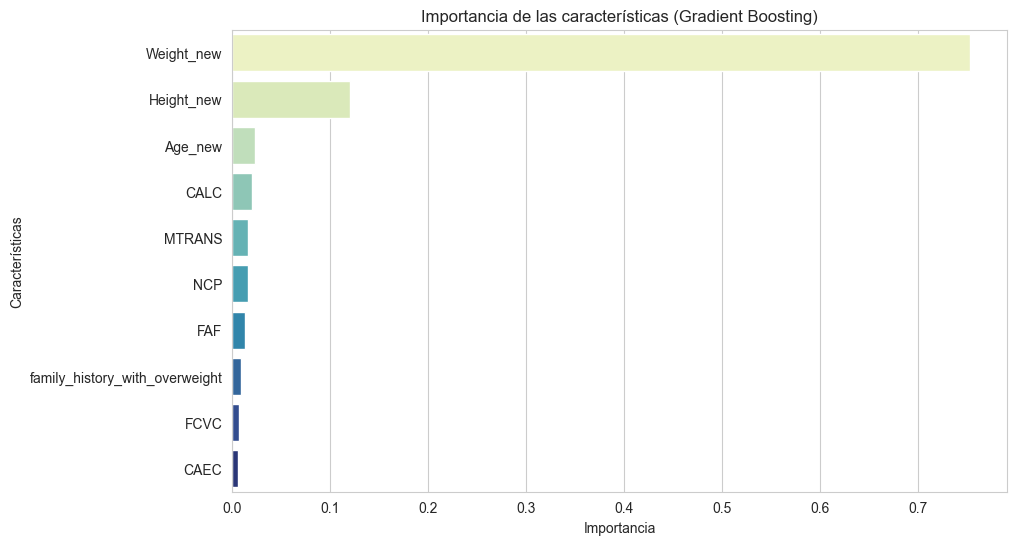

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener la importancia de las características del mejor estimador
feature_importance_gb = grid_search_gb.best_estimator_.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Ordenar la importancia de las características y los nombres de las características
sorted_indices = np.argsort(feature_importance_gb)[::-1]
sorted_importance = feature_importance_gb[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Establecer el estilo de seaborn con un grid de fondo
sns.set_style("whitegrid")

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance[:10], y=sorted_feature_names[:10], palette="YlGnBu")
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características (Gradient Boosting)')
plt.show()


### XGBoost según Accuracy

In [87]:
# Importar las librerías necesarias
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Parámetros a probar para XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Crear el modelo de XGBoost
xgb_model = XGBClassifier(random_state=seed)

# Configurar el GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search_xgb.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2313, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [88]:
# Obtener los resultados y mostrarlos
best_params_xgb = grid_search_xgb.best_params_
print('Mejores parámetros para XGBoost:')
print(best_params_xgb)

# Predicciones en el conjunto de prueba
y_pred_xgb_test = grid_search_xgb.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_xgb_test = accuracy_score(Y_test, y_pred_xgb_test)
print(f"Precisión en el conjunto de prueba: {accuracy_xgb_test * 100:.2f}%")


Mejores parámetros para XGBoost:
{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Precisión en el conjunto de prueba: 96.00%


<Figure size 1000x600 with 0 Axes>

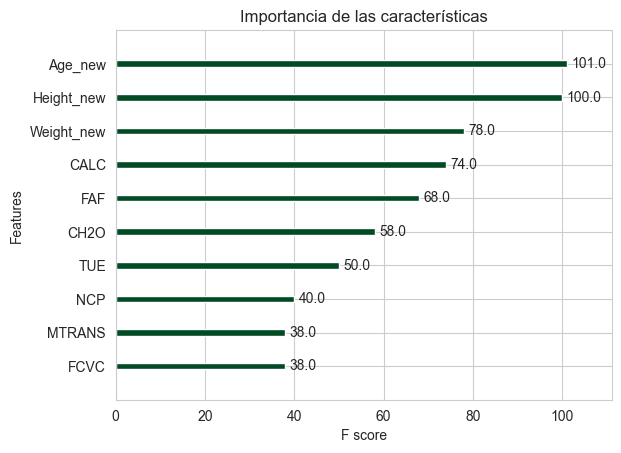

In [89]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Obtener la importancia de las características
feature_importance = grid_search_xgb.best_estimator_.feature_importances_

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plot_importance(grid_search_xgb.best_estimator_, importance_type='weight', max_num_features=10)  # Puedes ajustar max_num_features según sea necesario
plt.title('Importancia de las características')
plt.show()


## Apartado 7

### Modelo de SVM

In [90]:
# Definir los parámetros a probar para SVM con diferentes kernels
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Crear el modelo SVM
svm_model = SVC()

# Configurar GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [91]:
# Obtener los resultados y mostrarlos
print("Mejores parámetros para SVM:")
print(grid_search.best_params_)
print("Precisión en el conjunto de prueba: {:.2%}".format(grid_search.best_score_))

Mejores parámetros para SVM:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Precisión en el conjunto de prueba: 95.88%


In [92]:
print("Tamaño de param_grid['C']: ", len(param_grid['C']))
print("Tamaño de param_grid['gamma']: ", len(param_grid['gamma']))
print("Tamaño de mean_test_score: ", len(grid_search.cv_results_['mean_test_score']))


Tamaño de param_grid['C']:  6
Tamaño de param_grid['gamma']:  5
Tamaño de mean_test_score:  120


## Apartado 8

### Ensamblado de Bagging con SVM

In [93]:
# Define el pipeline con un escalador y el clasificador Bagging con SVM como clasificador base
bagging_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(base_estimator=SVC(kernel='linear'), n_estimators=10, random_state=seed))
])

# Entrena el pipeline en los datos de entrenamiento
bagging_pipeline.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging',
                 BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                   random_state=2313))])

In [94]:
# Realiza predicciones en el conjunto de prueba
y_pred = bagging_pipeline.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(Y_test, y_pred)
print("Precisión del modelo de Bagging con SVM:", accuracy)


Precisión del modelo de Bagging con SVM: 0.91


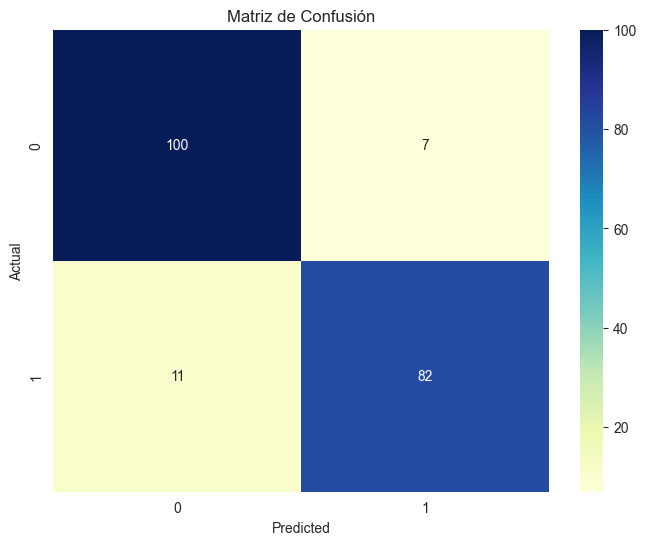

In [95]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Apartado 9

### Método de Stacking

In [96]:
# Define los modelos base (algoritmos de entrada)
base_models = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('neural_network', MLPClassifier())
]

# Define el modelo de ensamblaje
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Parámetros de búsqueda de cuadrícula para el modelo de Stacking
param_grid_stacking = {
    'final_estimator__C': [0.1, 1.0, 10.0],
    'final_estimator__penalty': ['l1', 'l2']
}

# Realizar la búsqueda de cuadrícula para el modelo de Stacking
grid_search_stacking = GridSearchCV(stacking_model, param_grid_stacking, cv=5)
grid_search_stacking.fit(X_train_scaled, Y_train)


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('logistic',
                                                       LogisticRegression()),
                                                      ('random_forest',
                                                       RandomForestClassifier()),
                                                      ('svm', SVC()),
                                                      ('neural_network',
                                                       MLPClassifier())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1.0, 10.0],
                         'final_estimator__penalty': ['l1', 'l2']})

In [97]:
from sklearn.metrics import accuracy_score

# Entrena los modelos base manualmente
for name, estimator in base_models:
    estimator.fit(X_train_scaled, Y_train)

# Realiza predicciones en el conjunto de prueba para cada modelo base
predictions_base_models = {name: estimator.predict(X_test_scaled) for name, estimator in base_models}

# Obtén los nombres de los modelos base
base_model_names = [name for name, _ in base_models]

# Imprime el porcentaje de precisión y los parámetros de cada modelo base
print('---------------------------------')
print("Resultados de los modelos base: |")
print('---------------------------------')
for name in base_model_names:
    # Realiza predicciones del modelo base
    y_pred = predictions_base_models[name]
    
    # Calcula la precisión del modelo base
    accuracy = accuracy_score(Y_test, y_pred)
    
    # Imprime el porcentaje de precisión del modelo base
    print(f"Modelo: {name}, Accuracy: {accuracy}")
    
    # Imprime los parámetros del modelo base
    print(f"Parámetros del modelo {name}: {base_models[base_model_names.index(name)][1].get_params()}")
    print('---------------------')

# Imprime el nombre del modelo base con mejor rendimiento
best_model_name = max(base_model_names, key=lambda name: accuracy_score(Y_test, predictions_base_models[name]))
print('------------------------------------------------------------')
print("Modelo base seleccionado en Stacking:", best_model_name)

# Muestra la precisión del modelo de Stacking
accuracy_stacking = accuracy_score(Y_test, predictions_base_models[best_model_name])
print("Accuracy Stacking:", accuracy_stacking)
print('------------------------------------------------------------')


---------------------------------
Resultados de los modelos base: |
---------------------------------
Modelo: logistic, Accuracy: 0.92
Parámetros del modelo logistic: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
---------------------
Modelo: random_forest, Accuracy: 0.97
Parámetros del modelo random_forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---------------------
Modelo: svm, Accuracy: 0.96
Parámetros del m

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


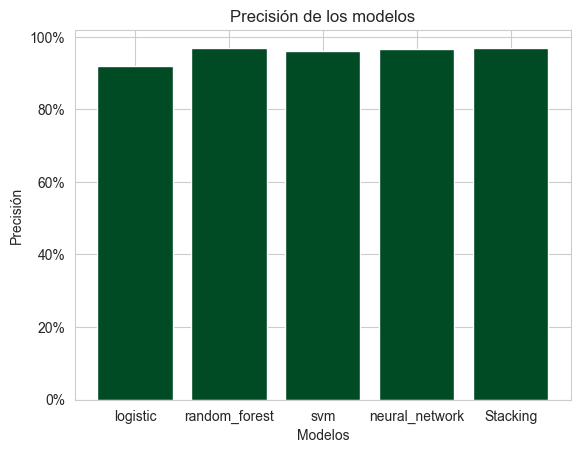

In [98]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Obtén las predicciones de cada modelo base
predictions = {name: accuracy_score(Y_test, y_pred) for name, y_pred in predictions_base_models.items()}

# Agrega la predicción del modelo de Stacking
predictions['Stacking'] = accuracy_stacking

# Crea una figura y un eje
fig, ax = plt.subplots()

# Grafica las predicciones
ax.bar(predictions.keys(), predictions.values())

# Formatea los valores del eje Y como porcentajes
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Etiqueta del eje x
ax.set_xlabel('Modelos')

# Etiqueta del eje y
ax.set_ylabel('Precisión')

# Título del gráfico
ax.set_title('Precisión de los modelos')

# Muestra el gráfico
plt.show()


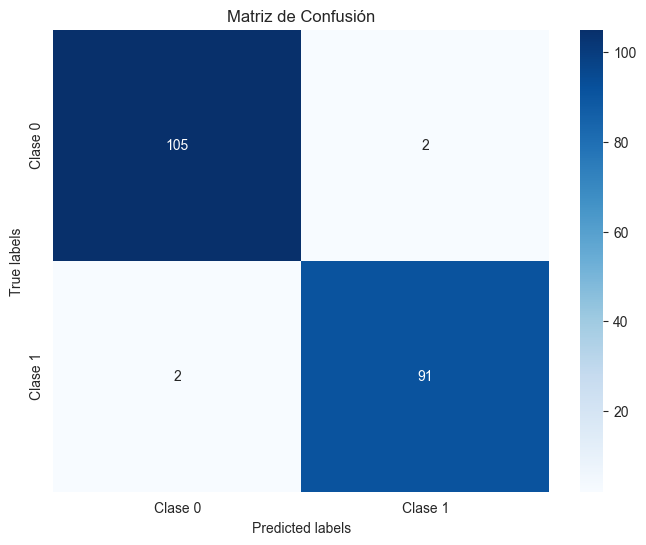

In [99]:


# Realiza predicciones en el conjunto de prueba con el modelo de Stacking
y_pred_stacking = grid_search_stacking.predict(X_test_scaled)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred_stacking)

# Definir etiquetas de clases
labels = ["Clase {}".format(i) for i in range(conf_matrix.shape[0])]

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Configuración de etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')

# Mostrar el plot
plt.show()